In [1]:
# Install required packages if needed
# install.packages(c("ggplot2", "forecast", "TSA", "tseries", "dplyr",
#                   "lubridate", "gridExtra", "MASS", "knitr", "lawstat",
#                   "FinTS", "ggthemes"))

In [2]:
suppressPackageStartupMessages({
  library(ggplot2)
  library(forecast)
  library(tseries)
  library(dplyr)
  library(lubridate)
  library(gridExtra)
  library(MASS)
  library(knitr)
  library(lawstat)
  library(FinTS)
  library(TSA)
})

In [3]:
# Plot settings
options(repr.plot.width = 20, repr.plot.height = 10)
theme_tsa <- function() {
  theme_minimal() +
    theme(
      plot.title = element_text(hjust = 0.5, face = "bold", size = 14),
      plot.subtitle = element_text(hjust = 0.5, size = 12),
      axis.title = element_text(face = "bold"),
      legend.position = "bottom",
      panel.grid.minor = element_line(color = "gray90"),
      panel.grid.major = element_line(color = "gray85")
    )
}

In [5]:
# Loading the data and checking for missing values and summary statistics
potgdp_df <- read.csv("../data/potential_gdp.csv")
potgdp_df$date <- as.Date(potgdp_df$date)
names(potgdp_df)[names(potgdp_df) == "value"] <- "gdp"  # Rename column if needed

cat("Dataset summary:\n")
print(summary(potgdp_df))

cat(
    "\nDate range:", format(min(potgdp_df$date), "%Y-%m-%d"),
    "to", format(max(potgdp_df$date), "%Y-%m-%d"), "\n"
)

cat(
    "Potential GDP range:", min(potgdp_df$gdp),
    "to", max(potgdp_df$gdp), "Billions of 2012 Dollars\n"
)

missing_values <- colSums(is.na(potgdp_df))
cat("\nMissing values by column:\n")
print(missing_values)

Dataset summary:
      date                 gdp       
 Min.   :1949-01-01   Min.   : 2255  
 1st Qu.:1970-09-08   1st Qu.: 5422  
 Median :1992-05-16   Median :10566  
 Mean   :1992-05-16   Mean   :12386  
 3rd Qu.:2014-01-23   3rd Qu.:18531  
 Max.   :2035-10-01   Max.   :28758  

Date range: 1949-01-01 to 2035-10-01 
Potential GDP range: 2254.867 to 28757.74 Billions of 2012 Dollars

Missing values by column:
date  gdp 
   0    0 


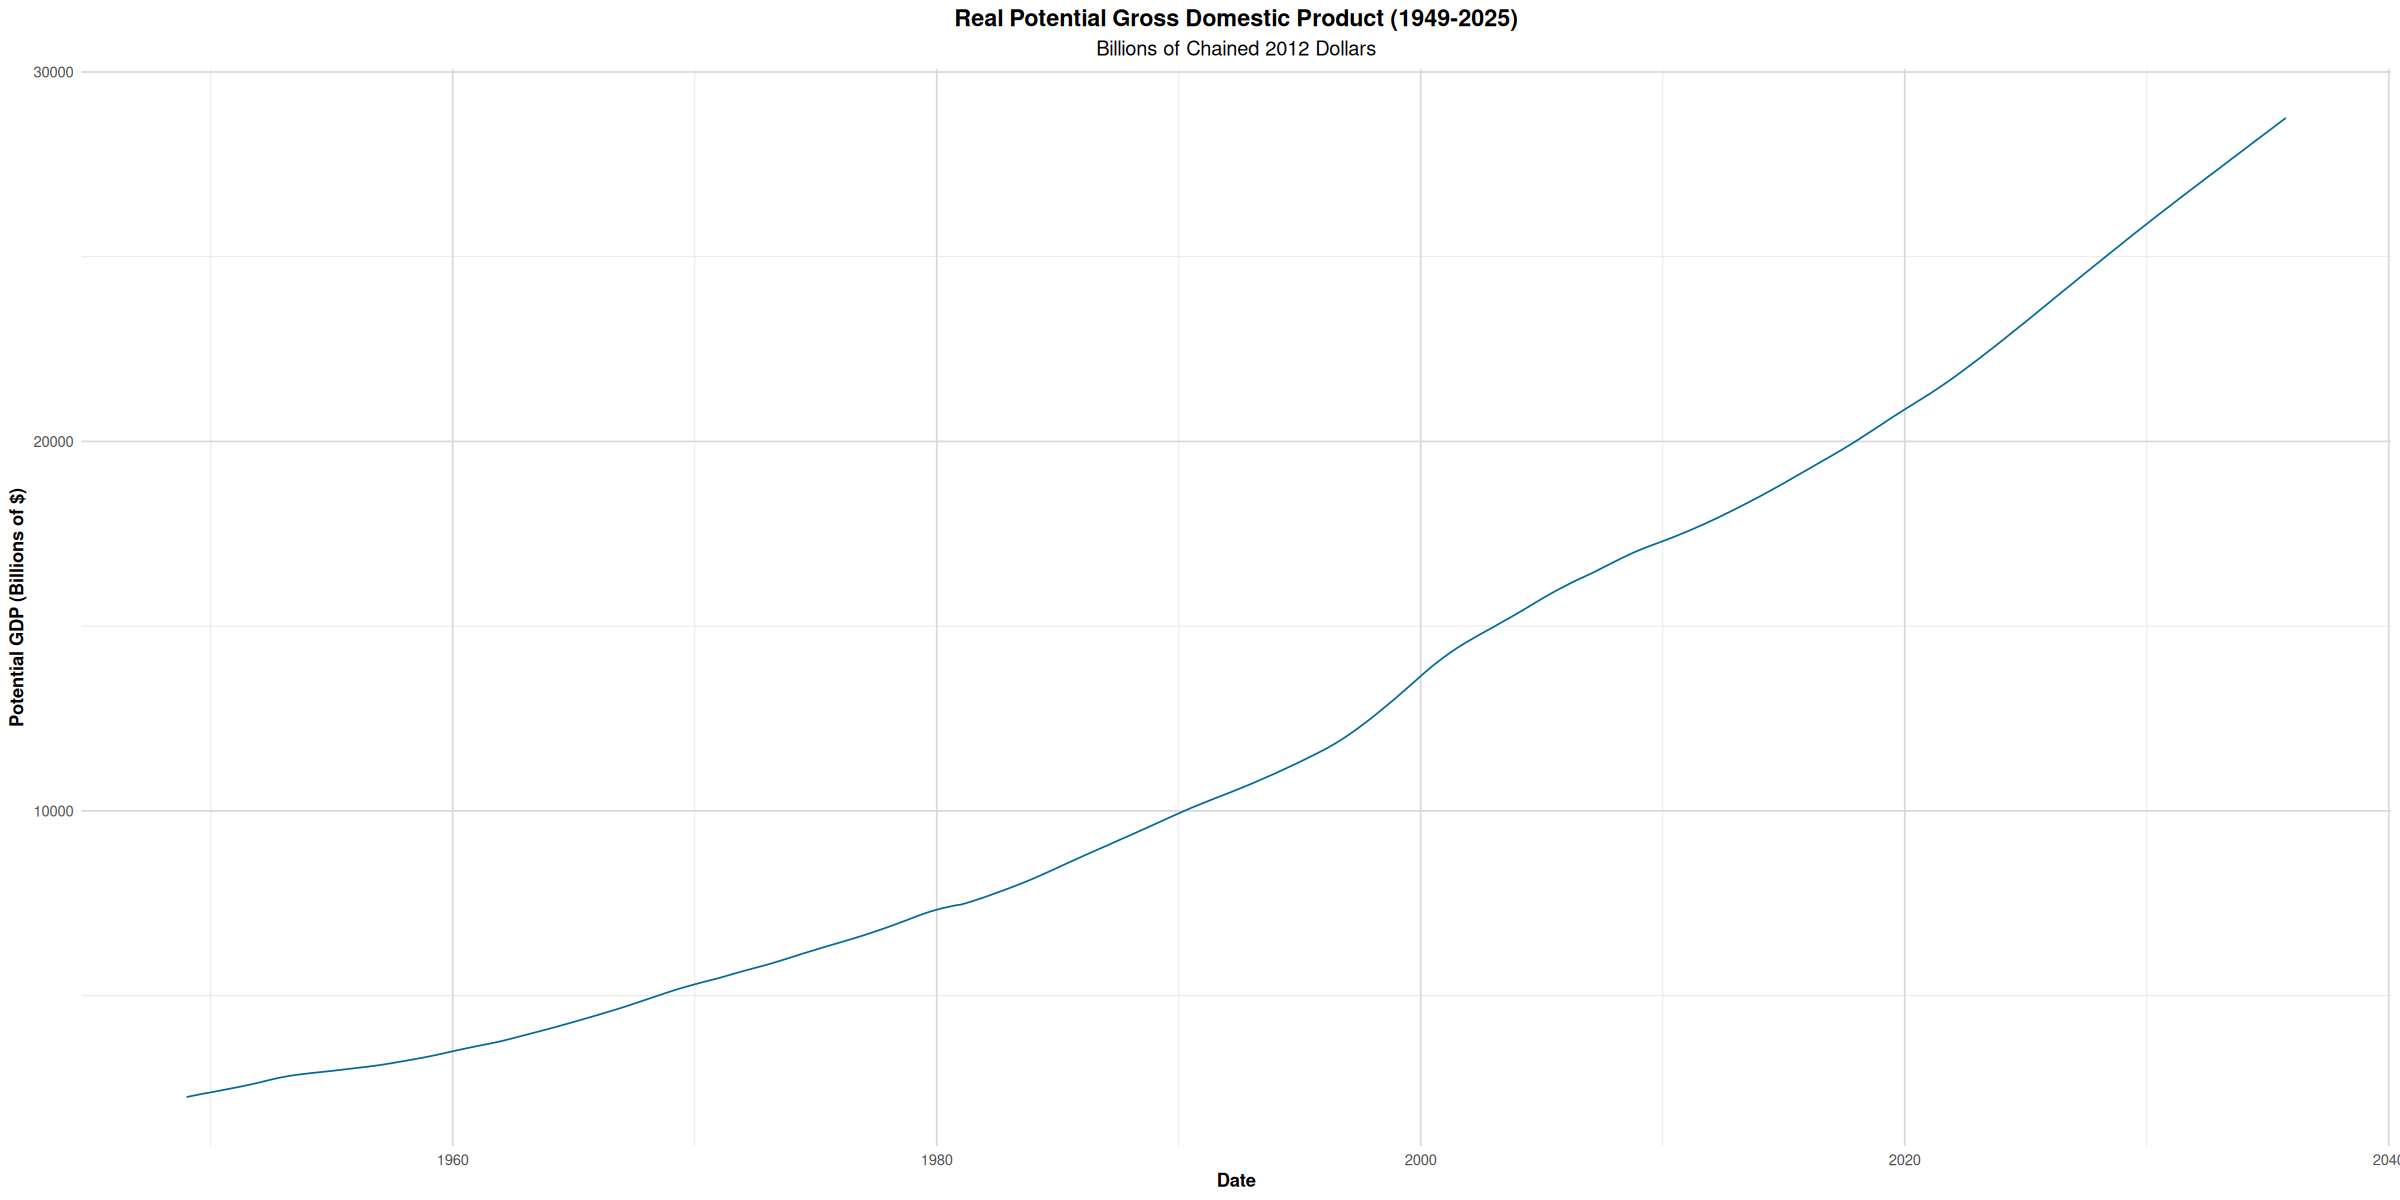

In [6]:
# Plot the series
p1 <- ggplot(potgdp_df, aes(x = date, y = gdp)) +
  geom_line(color = "#046B99") +  # Using a blue color for potential GDP
  labs(
    title = "Real Potential Gross Domestic Product (1949-2025)",
    subtitle = "Billions of Chained 2012 Dollars",
    x = "Date",
    y = "Potential GDP (Billions of $)"
  ) +
  theme_tsa()

print(p1)

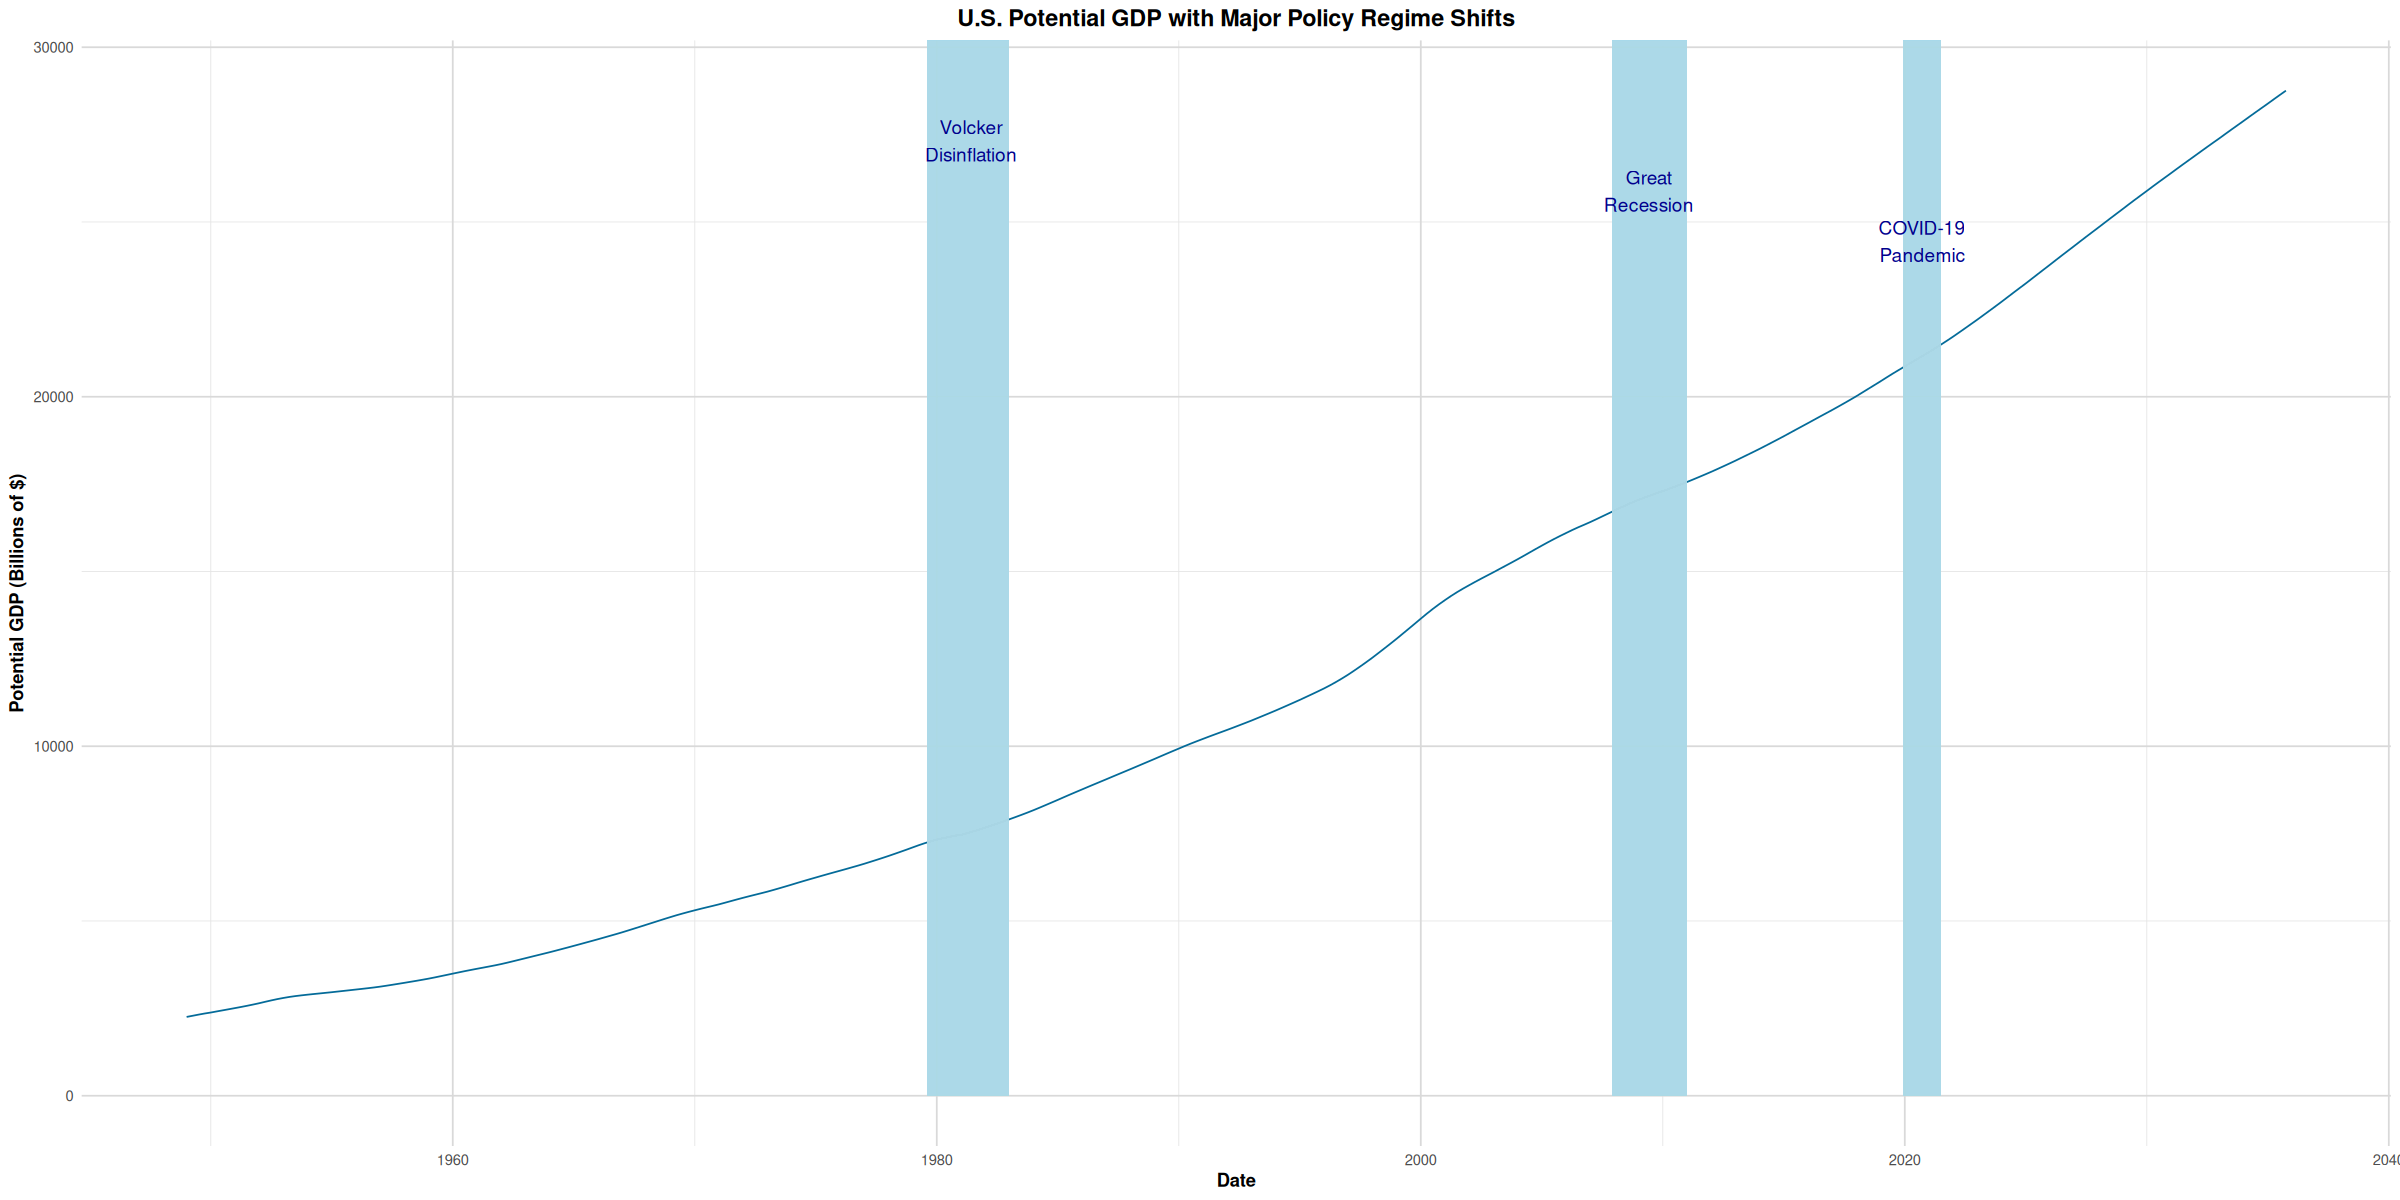

In [7]:
# Highlight key policy and economic regime shifts
p2 <- ggplot(potgdp_df, aes(x = date, y = gdp)) +
  geom_line(color = "#046B99") +
  geom_rect(
    aes(
      xmin = as.Date("1979-08-01"),
      xmax = as.Date("1982-12-31"),
      ymin = 0,
      ymax = Inf
    ),
    fill = "lightblue", alpha = 0.2
  ) +
  geom_rect(
    aes(
      xmin = as.Date("2007-12-01"),
      xmax = as.Date("2010-12-31"),
      ymin = 0,
      ymax = Inf
    ),
    fill = "lightblue", alpha = 0.2
  ) +
  geom_rect(
    aes(
      xmin = as.Date("2019-12-01"),
      xmax = as.Date("2021-06-30"),
      ymin = 0,
      ymax = Inf
    ),
    fill = "lightblue", alpha = 0.2
  ) +
  annotate("text",
    x = as.Date("1981-06-01"), y = max(potgdp_df$gdp) * 0.95,
    label = "Volcker\nDisinflation", color = "darkblue", size = 4
  ) +
  annotate("text",
    x = as.Date("2009-06-01"), y = max(potgdp_df$gdp) * 0.90,
    label = "Great\nRecession", color = "darkblue", size = 4
  ) +
  annotate("text",
    x = as.Date("2020-09-15"), y = max(potgdp_df$gdp) * 0.85,
    label = "COVID-19\nPandemic", color = "darkblue", size = 4
  ) +
  labs(
    title = "U.S. Potential GDP with Major Policy Regime Shifts",
    x = "Date",
    y = "Potential GDP (Billions of $)"
  ) +
  theme_tsa()

print(p2)

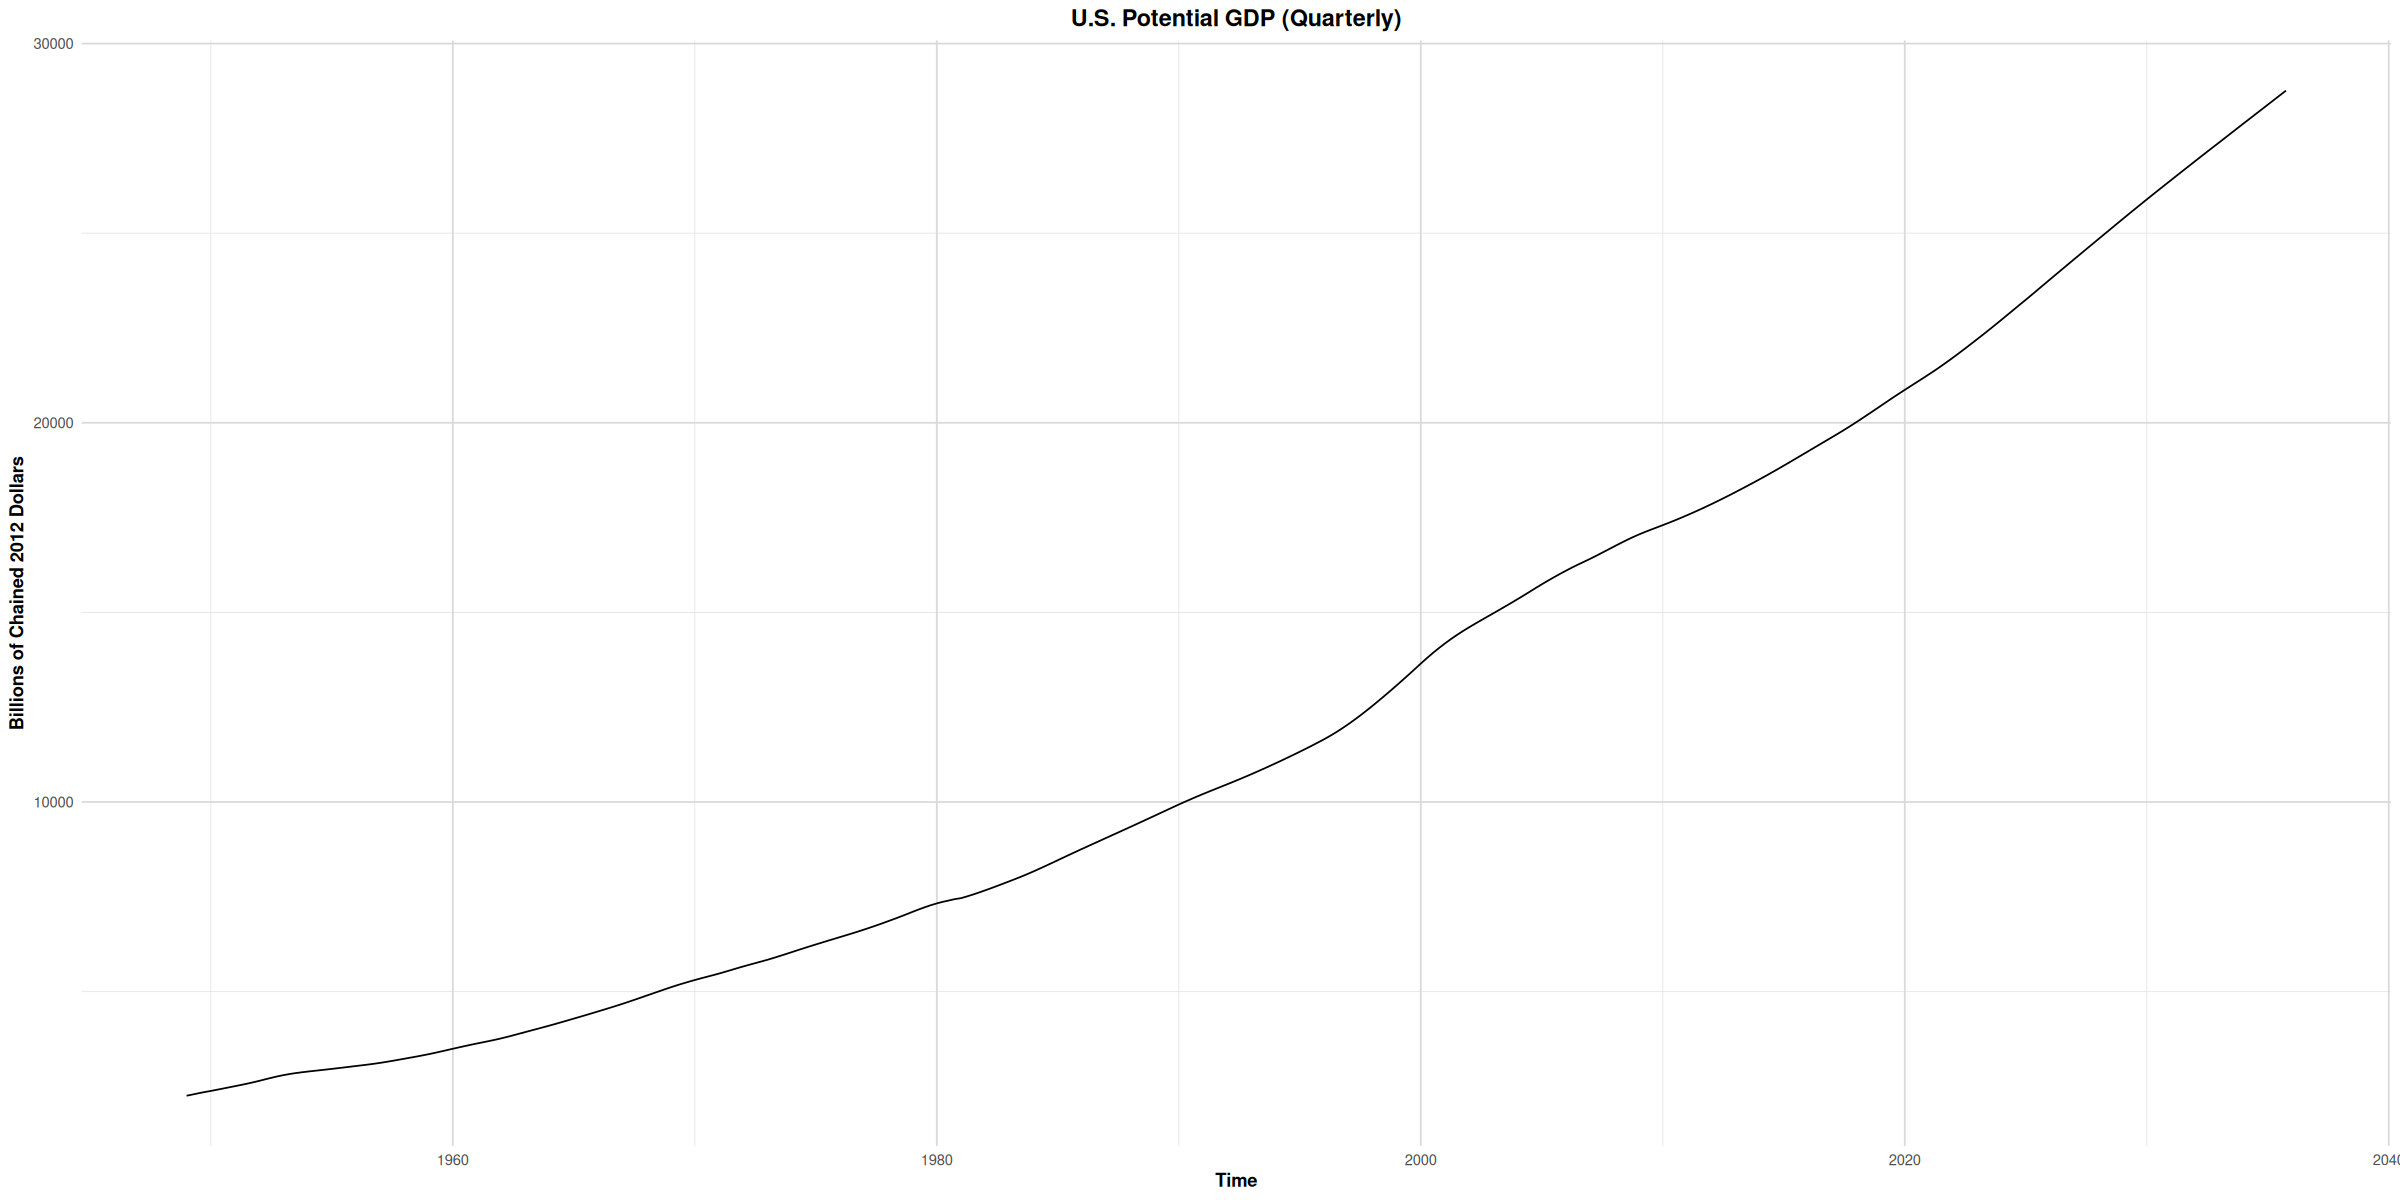

In [8]:
# Create a quarterly time series object (GDPPOT is quarterly data)
quarterly_ts <- ts(potgdp_df$gdp,
  frequency = 4,  # 4 for quarterly data
  start = c(
    year(min(potgdp_df$date)),
    quarter(min(potgdp_df$date))
  )
)

# Plot the time series
autoplot(quarterly_ts) +
  labs(
    title = "U.S. Potential GDP (Quarterly)",
    x = "Time",
    y = "Billions of Chained 2012 Dollars"
  ) +
  theme_tsa()

Optimal lambda for Box-Cox transformation: 0.3691056 
Using Box-Cox transformation with lambda = 0.3691056 


Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Original vs Box-Cox Transformation (λ = 0.3691 )' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Original vs Box-Cox Transformation (λ = 0.3691 )' in 'mbcsToSbcs': dot substituted for <bb>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Original vs Box-Cox Transformation (λ = 0.3691 )' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Original vs Box-Cox Transformation (λ = 0.3691 )' in 'mbcsToSbcs': dot substituted for <bb>”


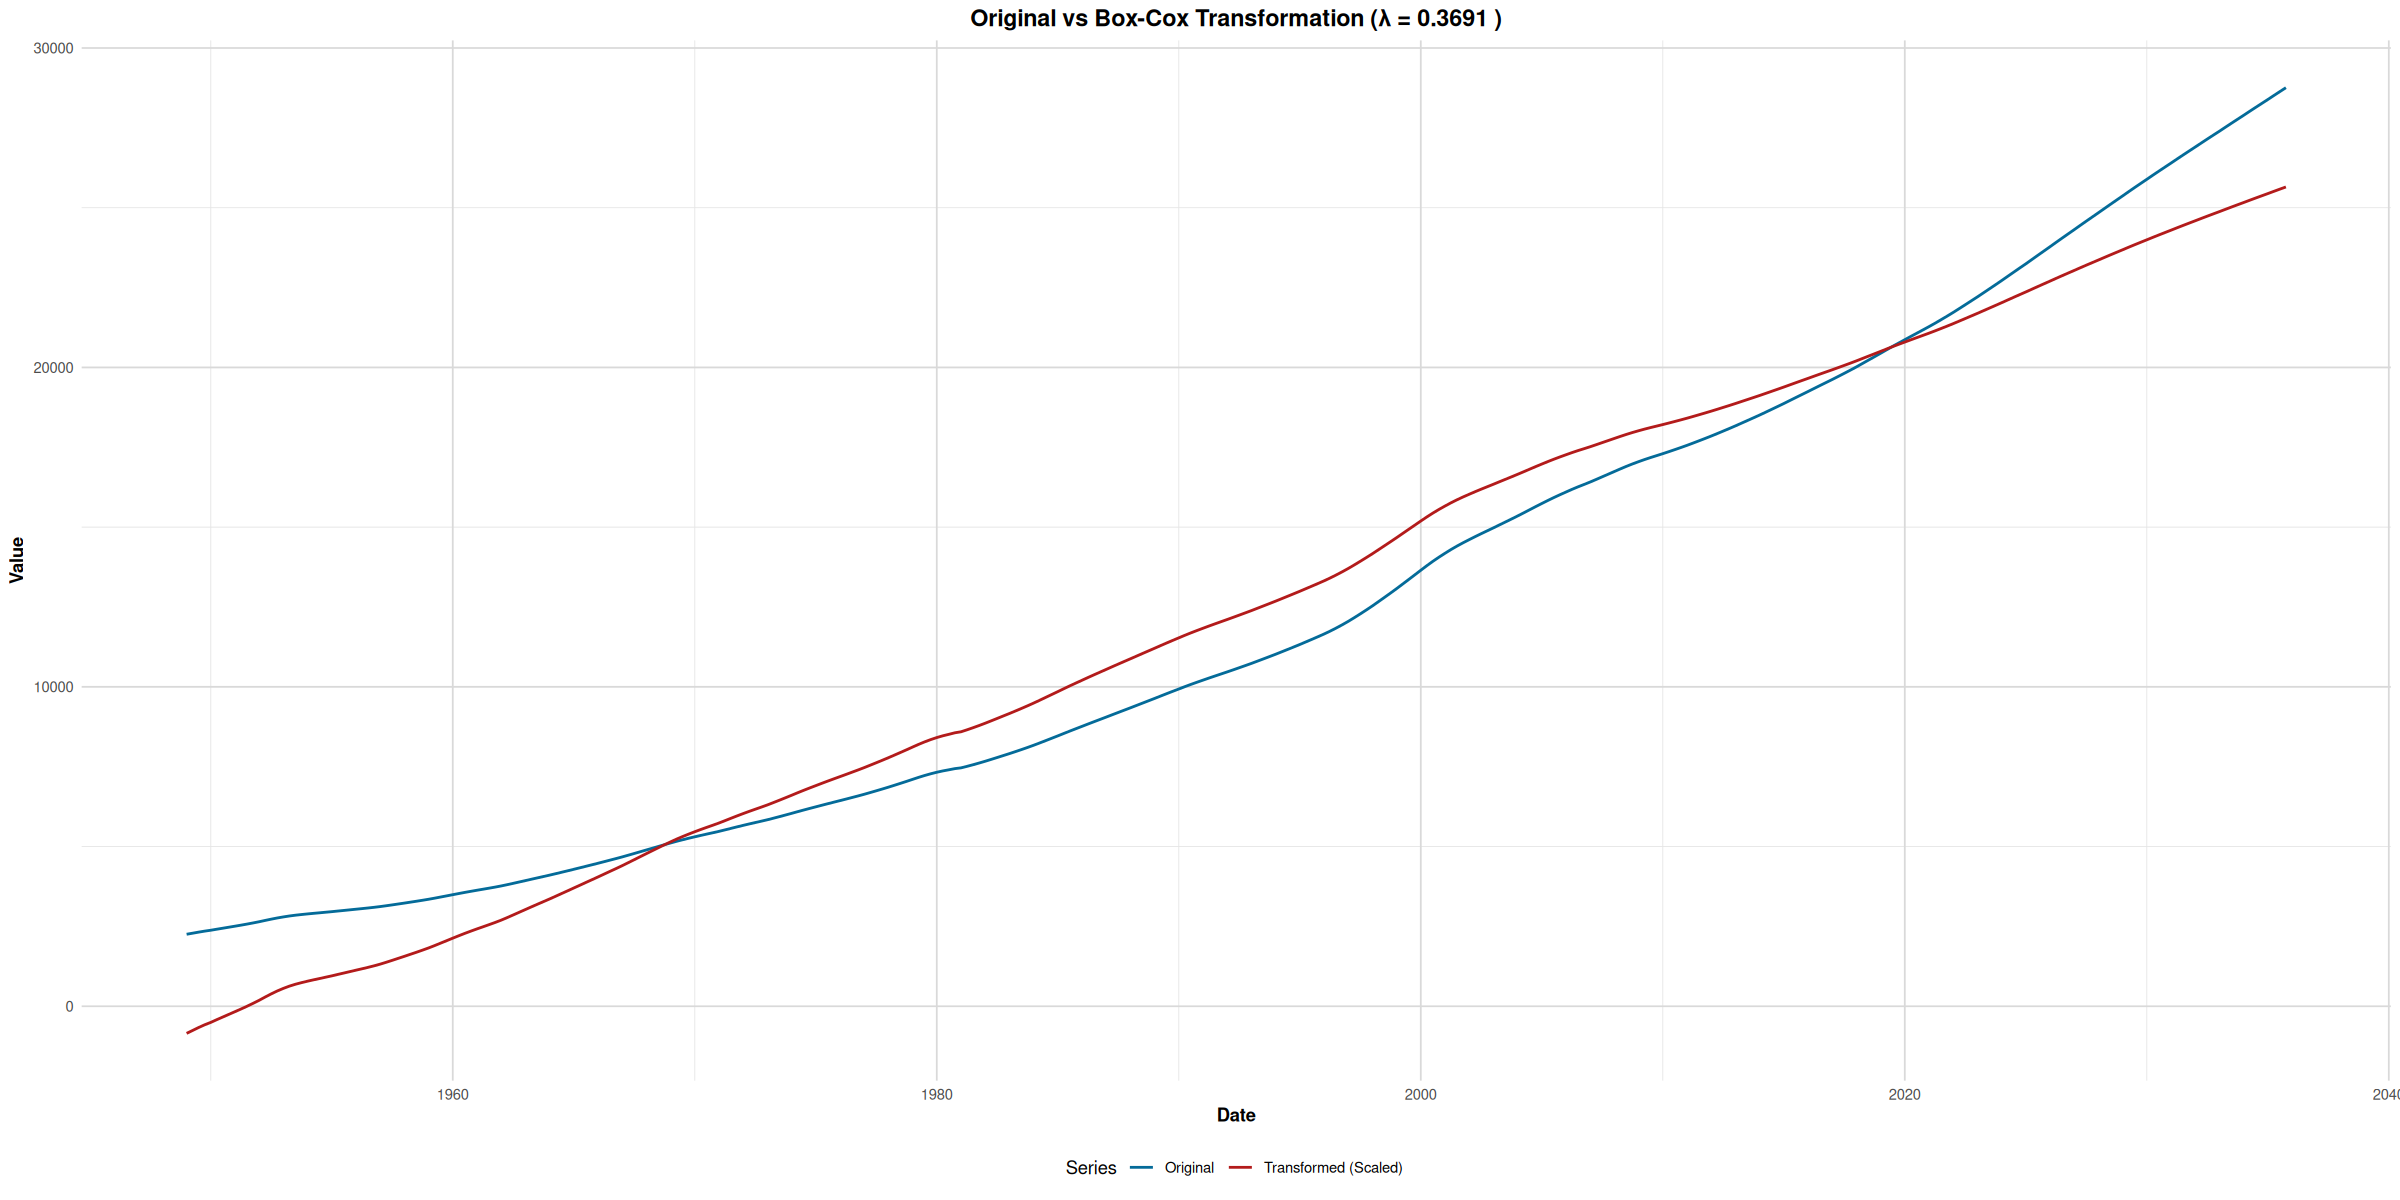

In [9]:
# Determine optimal transformation with Box-Cox
lambda <- BoxCox.lambda(quarterly_ts)
cat("Optimal lambda for Box-Cox transformation:", lambda, "\n")
if (abs(lambda) < 0.1) {
    cat("Lambda is close to 0, using log transformation\n")
    transformed_ts <- log(quarterly_ts)
    transformation_label <- "Log Transformation"
} else if (abs(lambda - 1) < 0.1) {
    cat("Lambda is close to 1, no transformation needed\n")
    transformed_ts <- quarterly_ts
    transformation_label <- "No Transformation"
} else if (lambda == 0) {
    cat("Lambda is 0, using log transformation\n")
    transformed_ts <- log(quarterly_ts)
    transformation_label <- "Log Transformation"
} else {
    cat("Using Box-Cox transformation with lambda =", lambda, "\n")
    transformed_ts <- BoxCox(quarterly_ts, lambda)
    transformation_label <- paste("Box-Cox Transformation (λ =", round(lambda, 4), ")")
}

transformed_df <- data.frame(
    Date = potgdp_df$date,
    Original = as.numeric(quarterly_ts),
    Transformed = as.numeric(transformed_ts)
)

p_trans <- ggplot(transformed_df, aes(x = Date)) +
    geom_line(aes(y = Original, color = "Original"), linewidth = 0.8) +
    geom_line(aes(
        y = scale(Transformed) * sd(Original) + mean(Original),
        color = "Transformed (Scaled)"
    ), linewidth = 0.8) +
    labs(
        title = paste("Original vs", transformation_label),
        x = "Date", y = "Value",
        color = "Series"
    ) +
    scale_color_manual(values = c("Original" = "#046B99", "Transformed (Scaled)" = "#B31B1B")) +
    theme_tsa()

print(p_trans)

In [11]:
# Test for stationarity using ADF test and KPSS test
adf_test <- adf.test(transformed_ts, alternative = "stationary")
kpss_test <- kpss.test(transformed_ts, null = "Trend")

cat("ADF Test for Stationarity:\n")
print(adf_test)

cat("\nKPSS Test for Stationarity:\n")
print(kpss_test)

cat("\nConclusion:\n")
if (adf_test$p.value < 0.05) {
    cat("ADF test rejects the null hypothesis, series is stationary\n")
} else {
    cat("ADF test fails to reject the null hypothesis, series is non-stationary\n")
}
if (kpss_test$p.value < 0.05) {
    cat("KPSS test rejects the null hypothesis, series is non-stationary\n")
} else {
    cat("KPSS test fails to reject the null hypothesis, series is stationary\n")
}

Warning message in kpss.test(transformed_ts, null = "Trend"):
“p-value smaller than printed p-value”


ADF Test for Stationarity:

	Augmented Dickey-Fuller Test

data:  transformed_ts
Dickey-Fuller = -3.1286, Lag order = 7, p-value = 0.1006
alternative hypothesis: stationary


KPSS Test for Stationarity:

	KPSS Test for Trend Stationarity

data:  transformed_ts
KPSS Trend = 0.42906, Truncation lag parameter = 5, p-value = 0.01


Conclusion:
ADF test fails to reject the null hypothesis, series is non-stationary
KPSS test rejects the null hypothesis, series is non-stationary


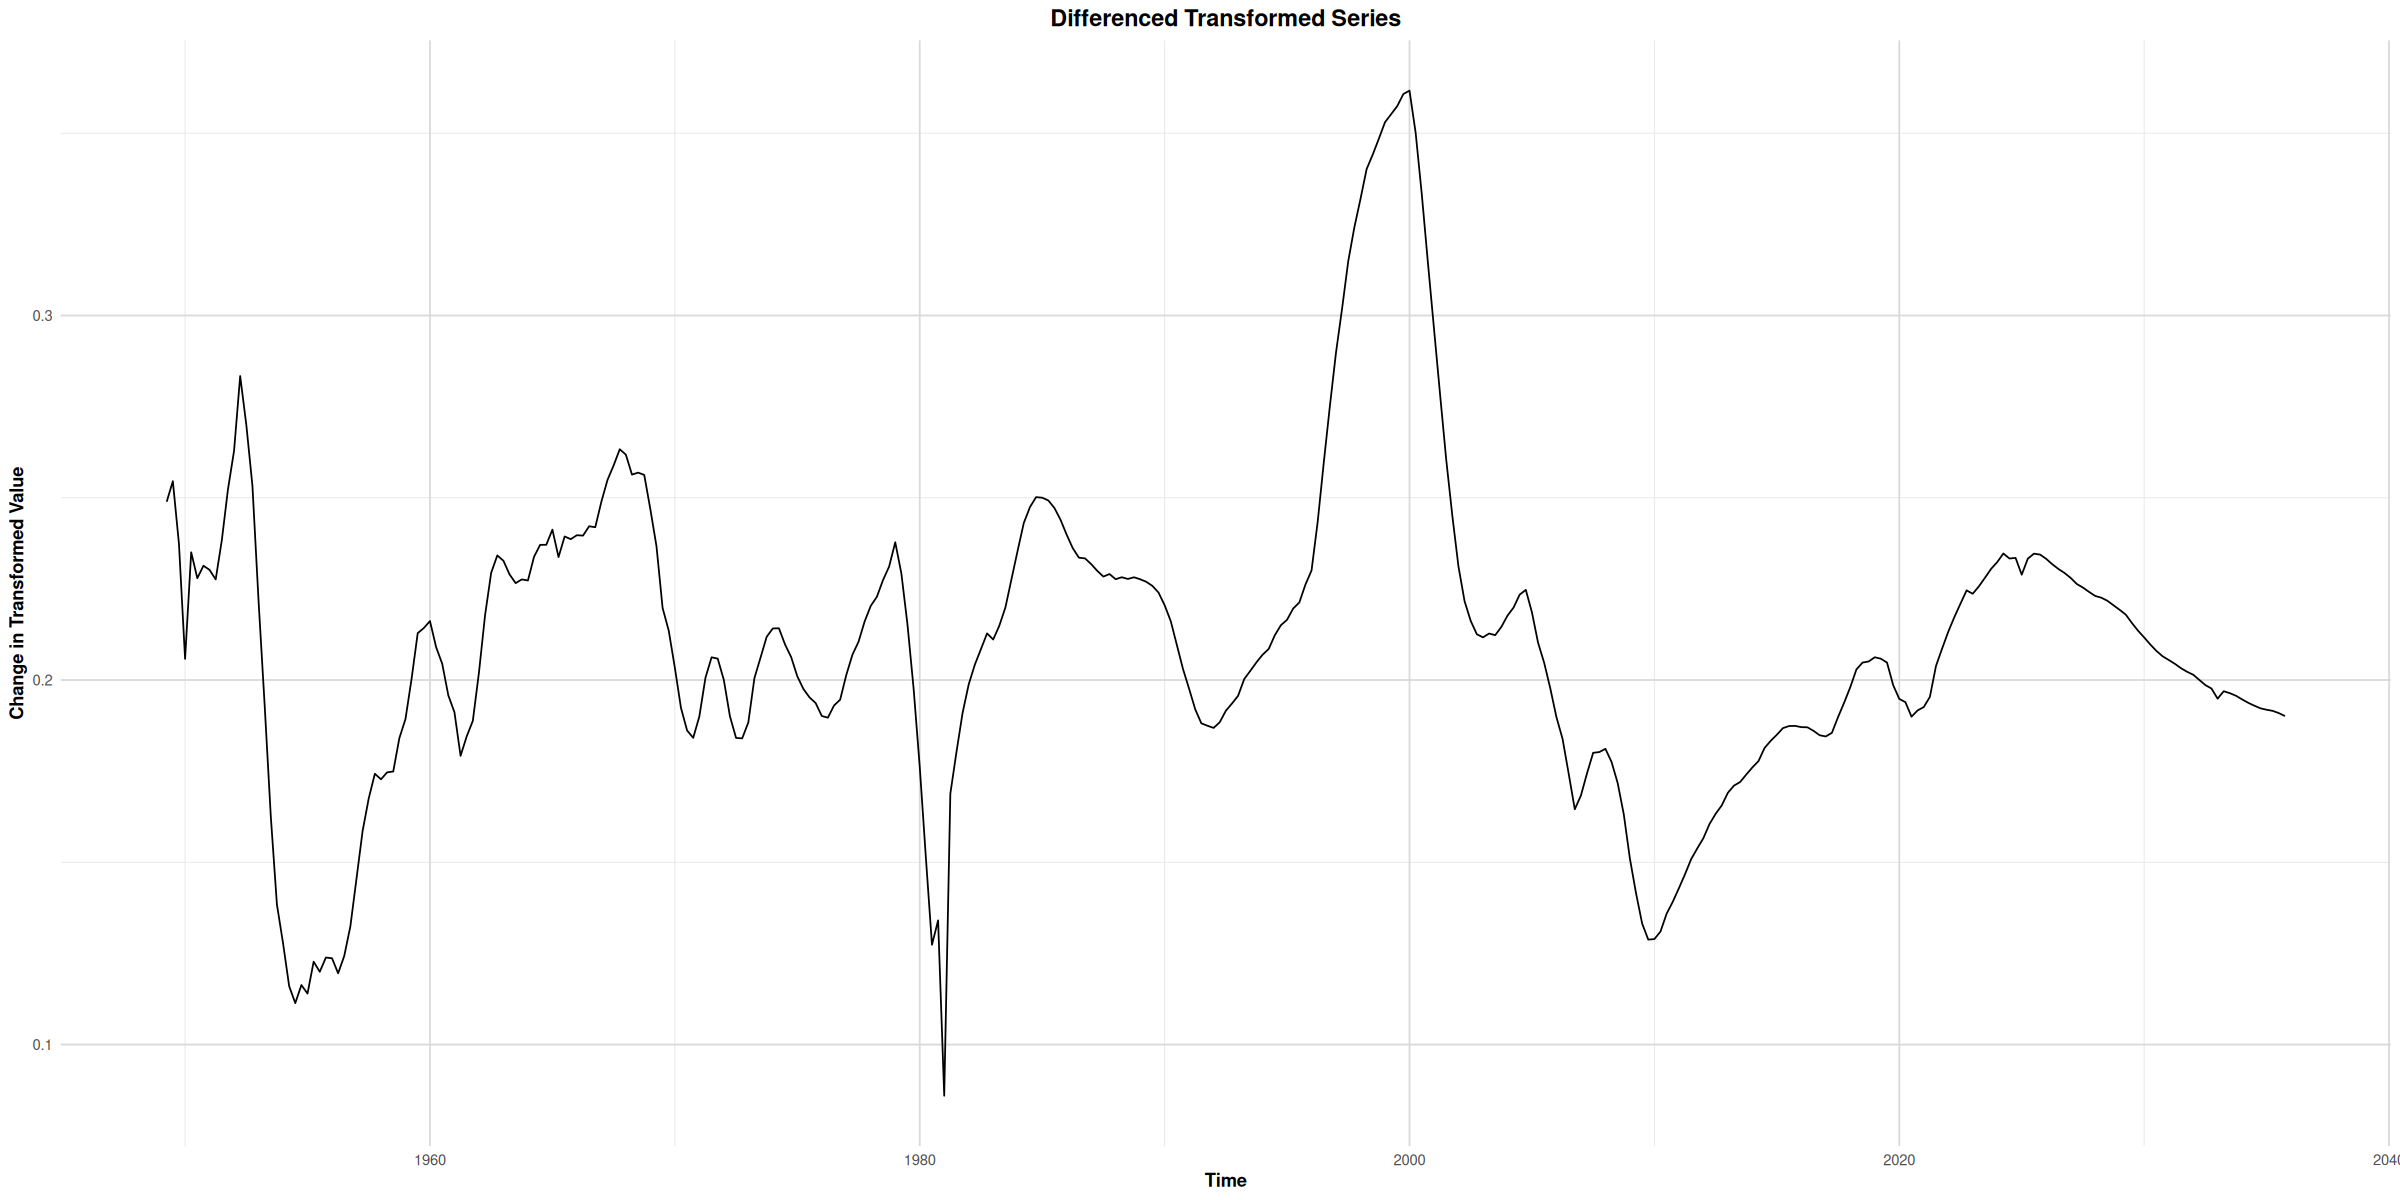

In [12]:
# Differencing to achieve stationarity
diff_ts <- diff(transformed_ts)

p_diff <- autoplot(diff_ts) +
    labs(
        title = "Differenced Transformed Series",
        x = "Time", y = "Change in Transformed Value"
    ) +
    theme_tsa()

print(p_diff)

In [14]:
# Test for stationarity after differencing
adf_test_diff <- adf.test(diff_ts, alternative = "stationary")
kpss_test_diff <- kpss.test(diff_ts, null = "Trend")

cat("ADF Test for Stationarity (After Differencing):\n")
print(adf_test_diff)

cat("\nKPSS Test for Stationarity (After Differencing):\n")
print(kpss_test_diff)

cat("\nConclusion (After Differencing):\n")
if (adf_test_diff$p.value < 0.05) {
    cat("ADF test rejects the null hypothesis, series is stationary\n")
} else {
    cat("ADF test fails to reject the null hypothesis, series is non-stationary\n")
}
if (kpss_test_diff$p.value < 0.05) {
    cat("KPSS test rejects the null hypothesis, series is non-stationary\n")
} else {
    cat("KPSS test fails to reject the null hypothesis, series is stationary\n")
}

ADF Test for Stationarity (After Differencing):

	Augmented Dickey-Fuller Test

data:  diff_ts
Dickey-Fuller = -3.2696, Lag order = 7, p-value = 0.07644
alternative hypothesis: stationary


KPSS Test for Stationarity (After Differencing):

	KPSS Test for Trend Stationarity

data:  diff_ts
KPSS Trend = 0.18578, Truncation lag parameter = 5, p-value = 0.02133


Conclusion (After Differencing):
ADF test fails to reject the null hypothesis, series is non-stationary
KPSS test rejects the null hypothesis, series is non-stationary


Warning message in adf.test(diff2_ts, alternative = "stationary"):
“p-value smaller than printed p-value”
Warning message in kpss.test(diff2_ts, null = "Trend"):
“p-value greater than printed p-value”


ADF Test for Stationarity (Second Differencing):

	Augmented Dickey-Fuller Test

data:  diff2_ts
Dickey-Fuller = -6.2366, Lag order = 7, p-value = 0.01
alternative hypothesis: stationary


KPSS Test for Stationarity (Second Differencing):

	KPSS Test for Trend Stationarity

data:  diff2_ts
KPSS Trend = 0.032498, Truncation lag parameter = 5, p-value = 0.1


Conclusion (Second Differencing):
ADF test rejects the null hypothesis, series is stationary
KPSS test fails to reject the null hypothesis, series is stationary


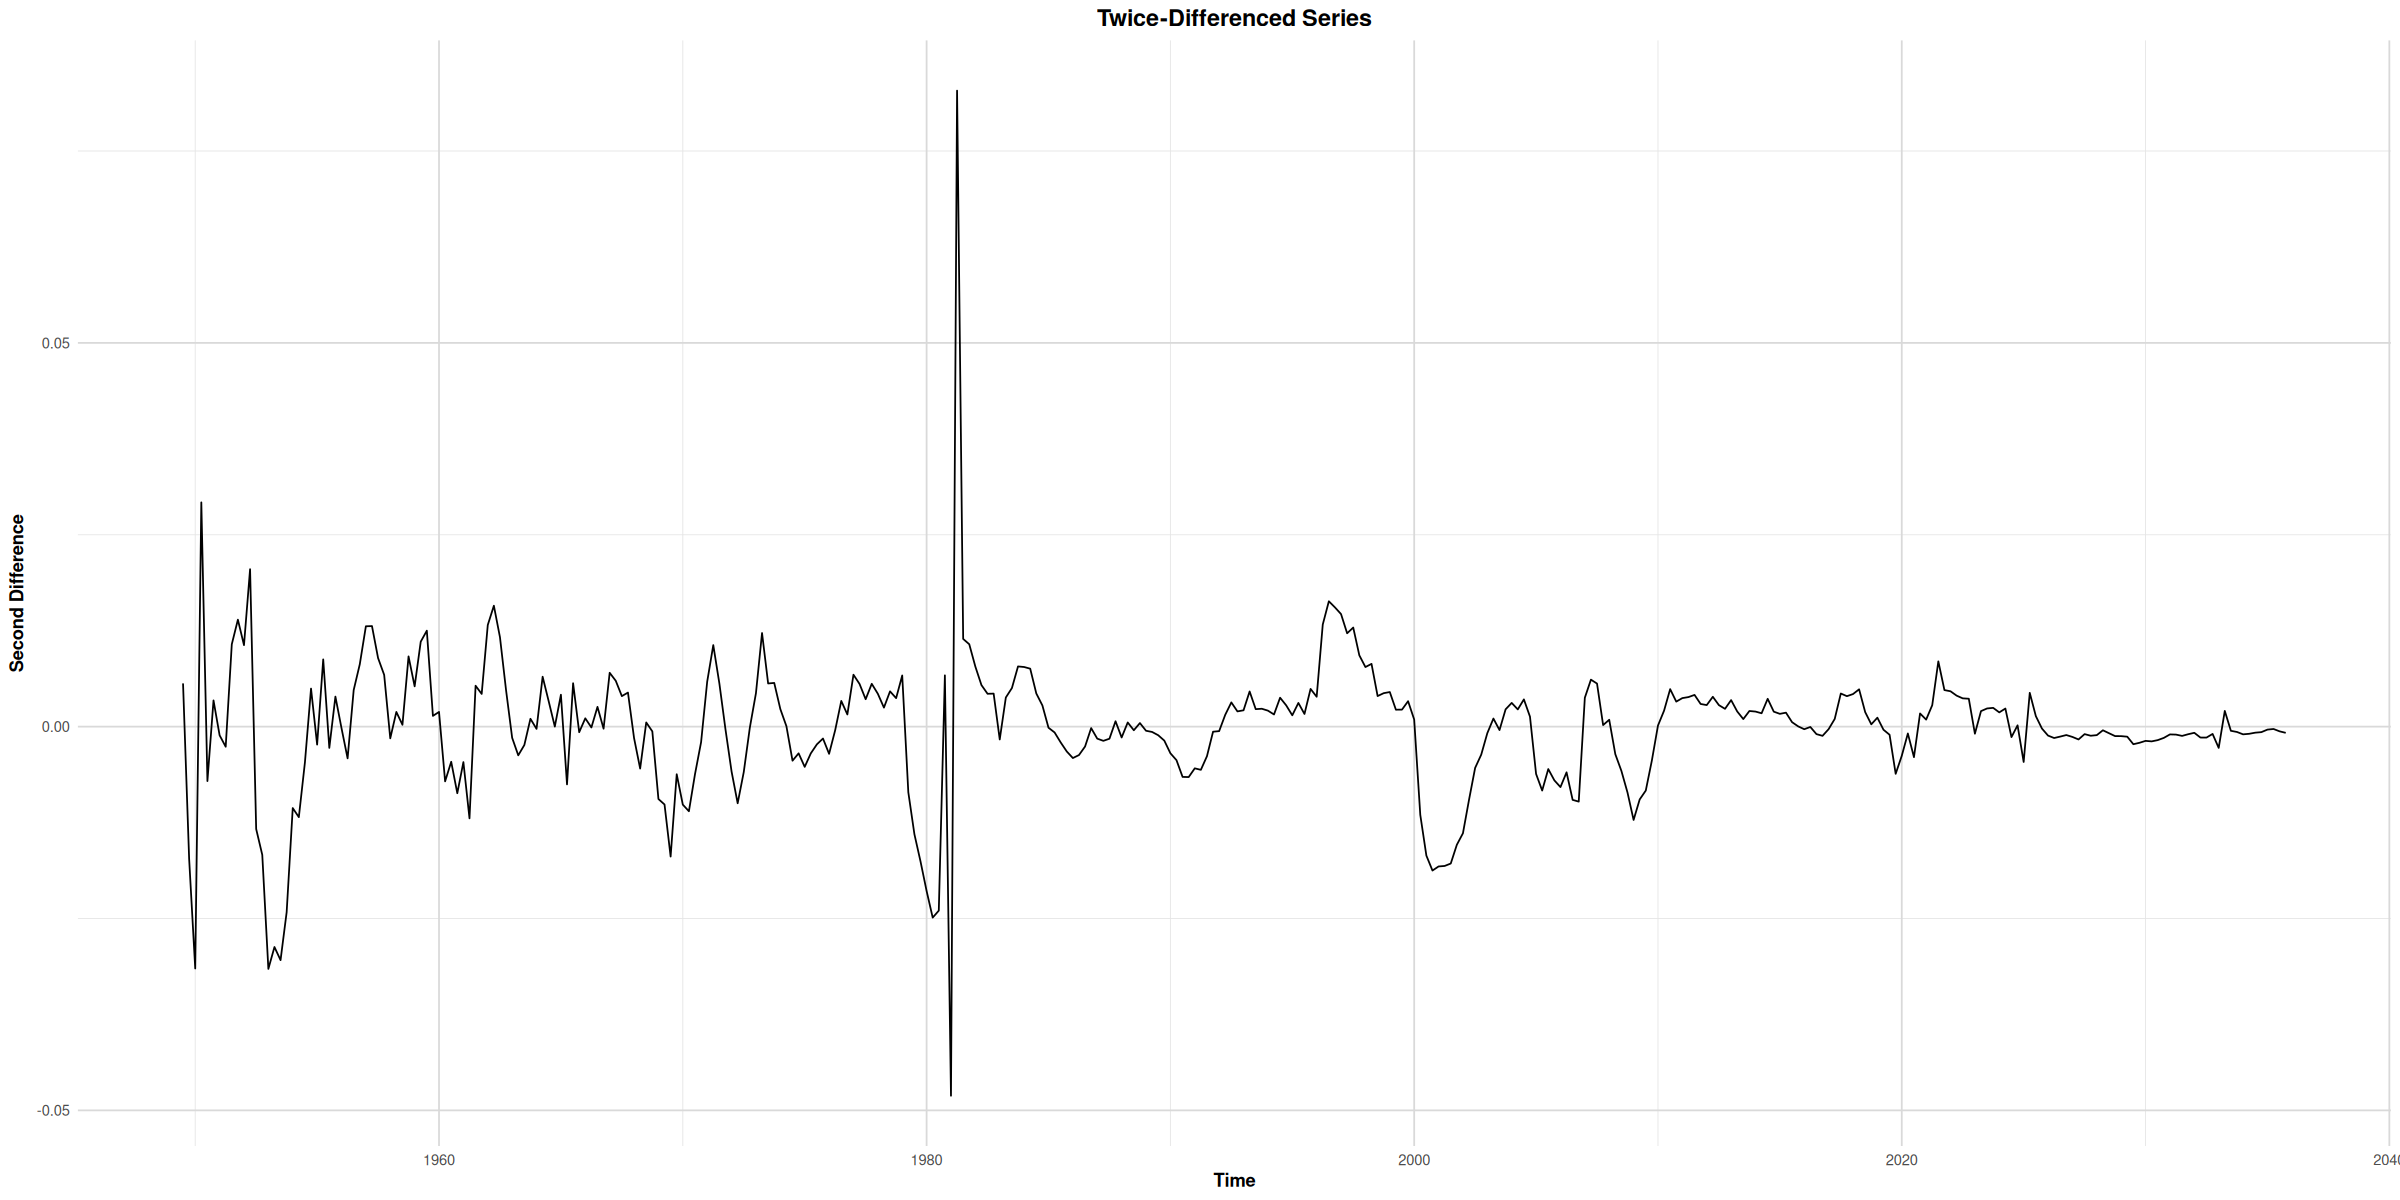

In [16]:
# Second differencing
diff2_ts <- diff(diff_ts)

p_diff2 <- autoplot(diff2_ts) +
    labs(
        title = "Twice-Differenced Series",
        x = "Time", y = "Second Difference"
    ) +
    theme_tsa()

print(p_diff2)

# Test second differencing for stationarity
adf_test_diff2 <- adf.test(diff2_ts, alternative = "stationary")
kpss_test_diff2 <- kpss.test(diff2_ts, null = "Trend")

cat("ADF Test for Stationarity (Second Differencing):\n")
print(adf_test_diff2)

cat("\nKPSS Test for Stationarity (Second Differencing):\n")
print(kpss_test_diff2)

cat("\nConclusion (Second Differencing):\n")
if (adf_test_diff2$p.value < 0.05) {
    cat("ADF test rejects the null hypothesis, series is stationary\n")
} else {
    cat("ADF test fails to reject the null hypothesis, series is non-stationary\n")
}
if (kpss_test_diff2$p.value < 0.05) {
    cat("KPSS test rejects the null hypothesis, series is non-stationary\n")
} else {
    cat("KPSS test fails to reject the null hypothesis, series is stationary\n")
}

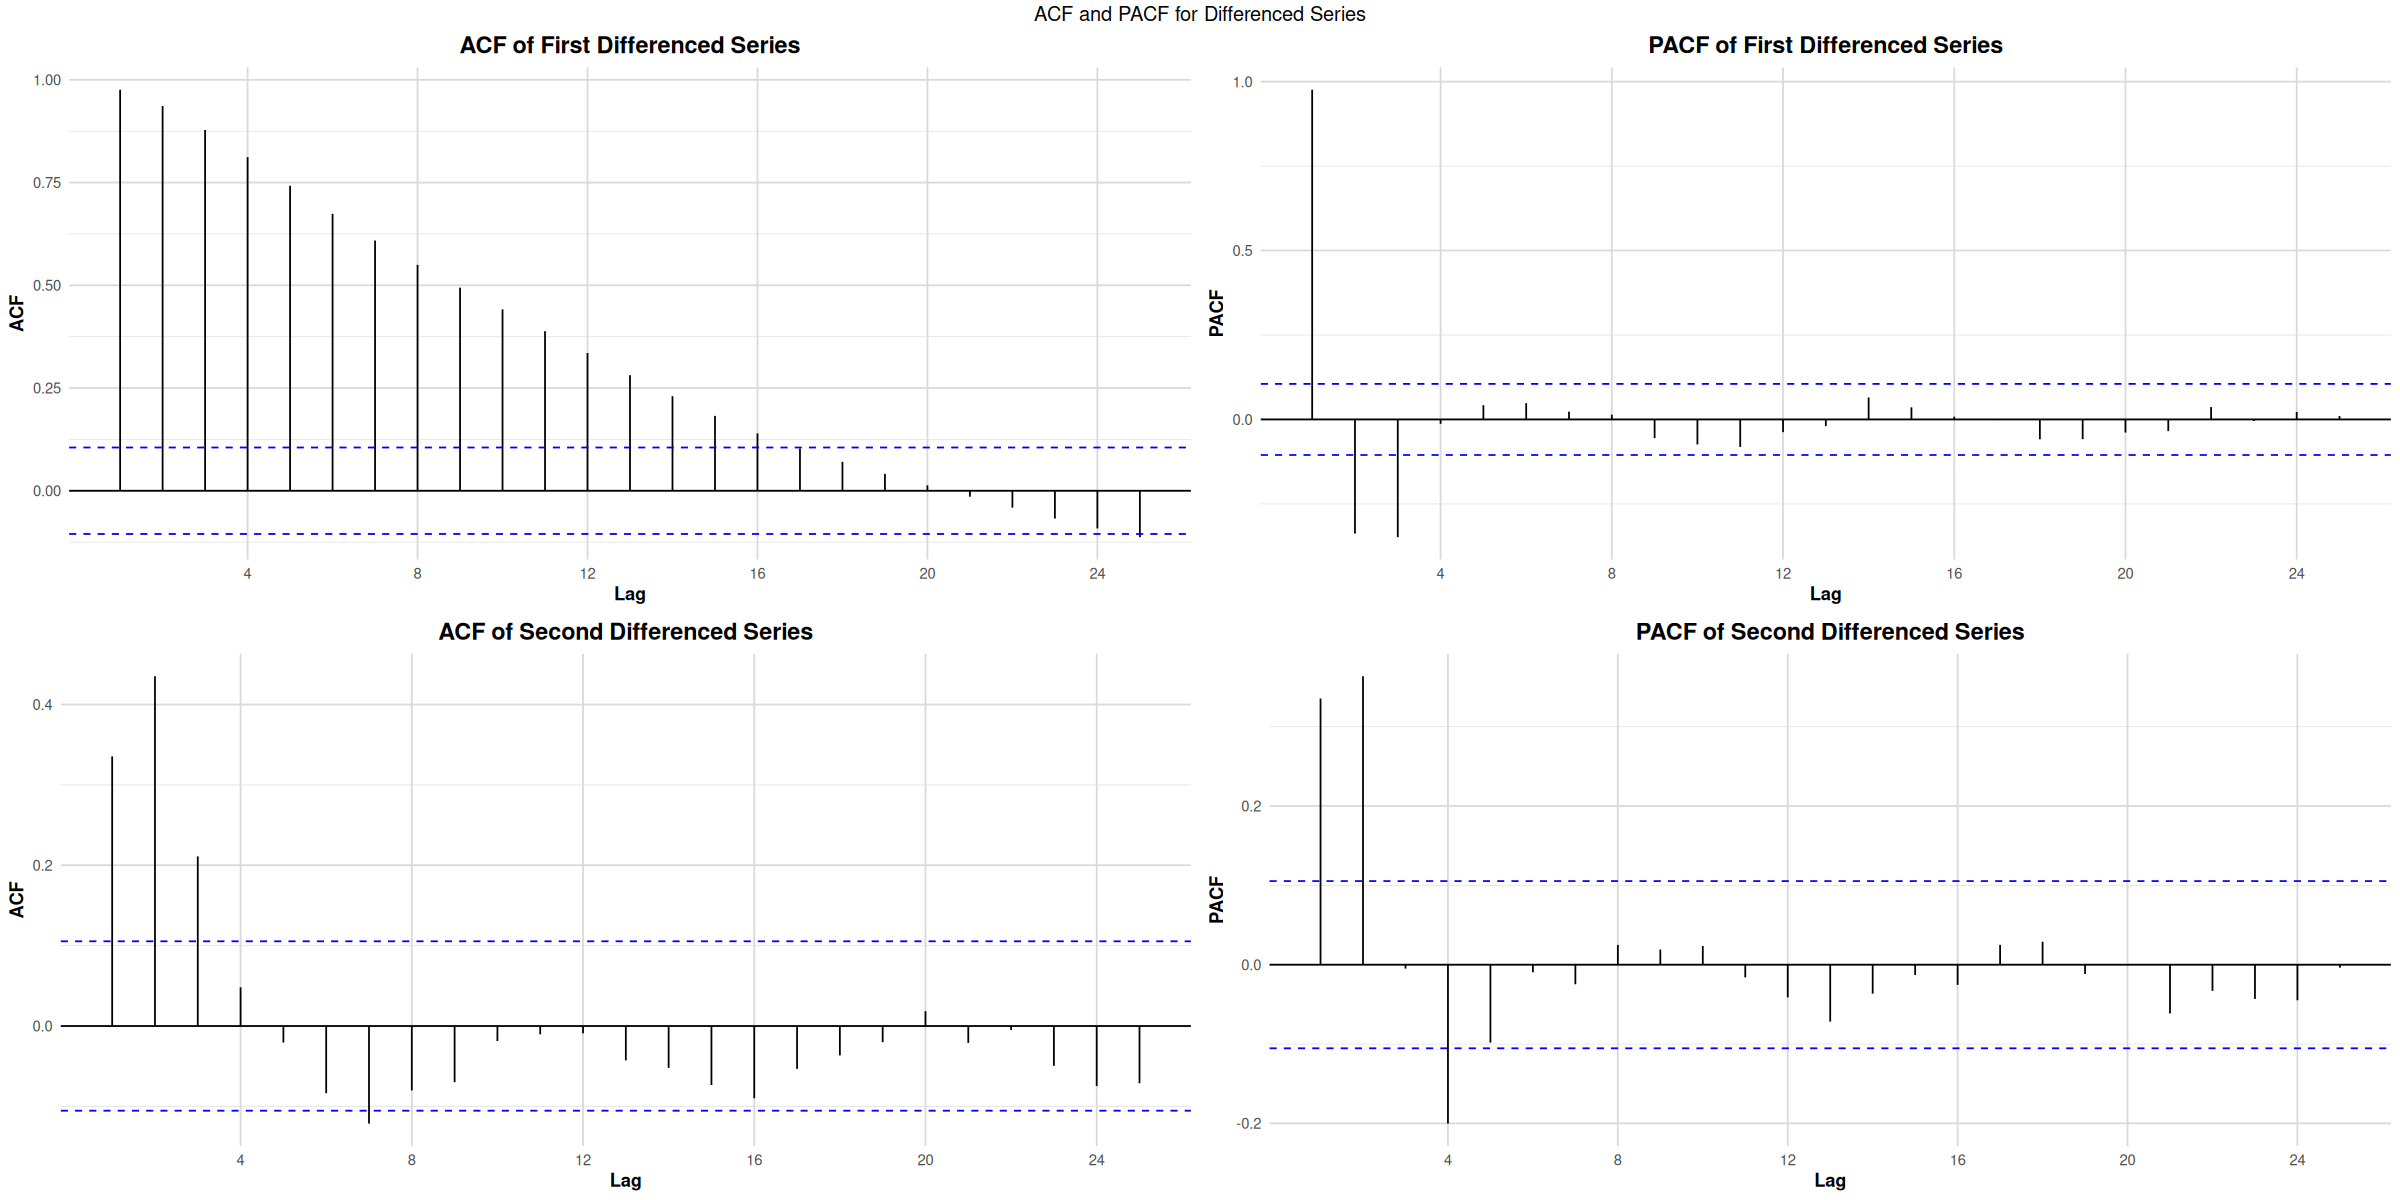

In [17]:
# Plot ACF and PACF for the first differenced series
par(mfrow = c(1, 2))
acf_diff <- ggAcf(diff_ts) +
    labs(title = "ACF of First Differenced Series") +
    theme_tsa()

pacf_diff <- ggPacf(diff_ts) +
    labs(title = "PACF of First Differenced Series") +
    theme_tsa()

# Plot ACF and PACF for the second differenced series
acf_diff2 <- ggAcf(diff2_ts) +
    labs(title = "ACF of Second Differenced Series") +
    theme_tsa()

pacf_diff2 <- ggPacf(diff2_ts) +
    labs(title = "PACF of Second Differenced Series") +
    theme_tsa()

# Arrange plots in a grid
grid.arrange(
    acf_diff, pacf_diff, 
    acf_diff2, pacf_diff2, 
    ncol = 2,
    top = "ACF and PACF for Differenced Series"
)

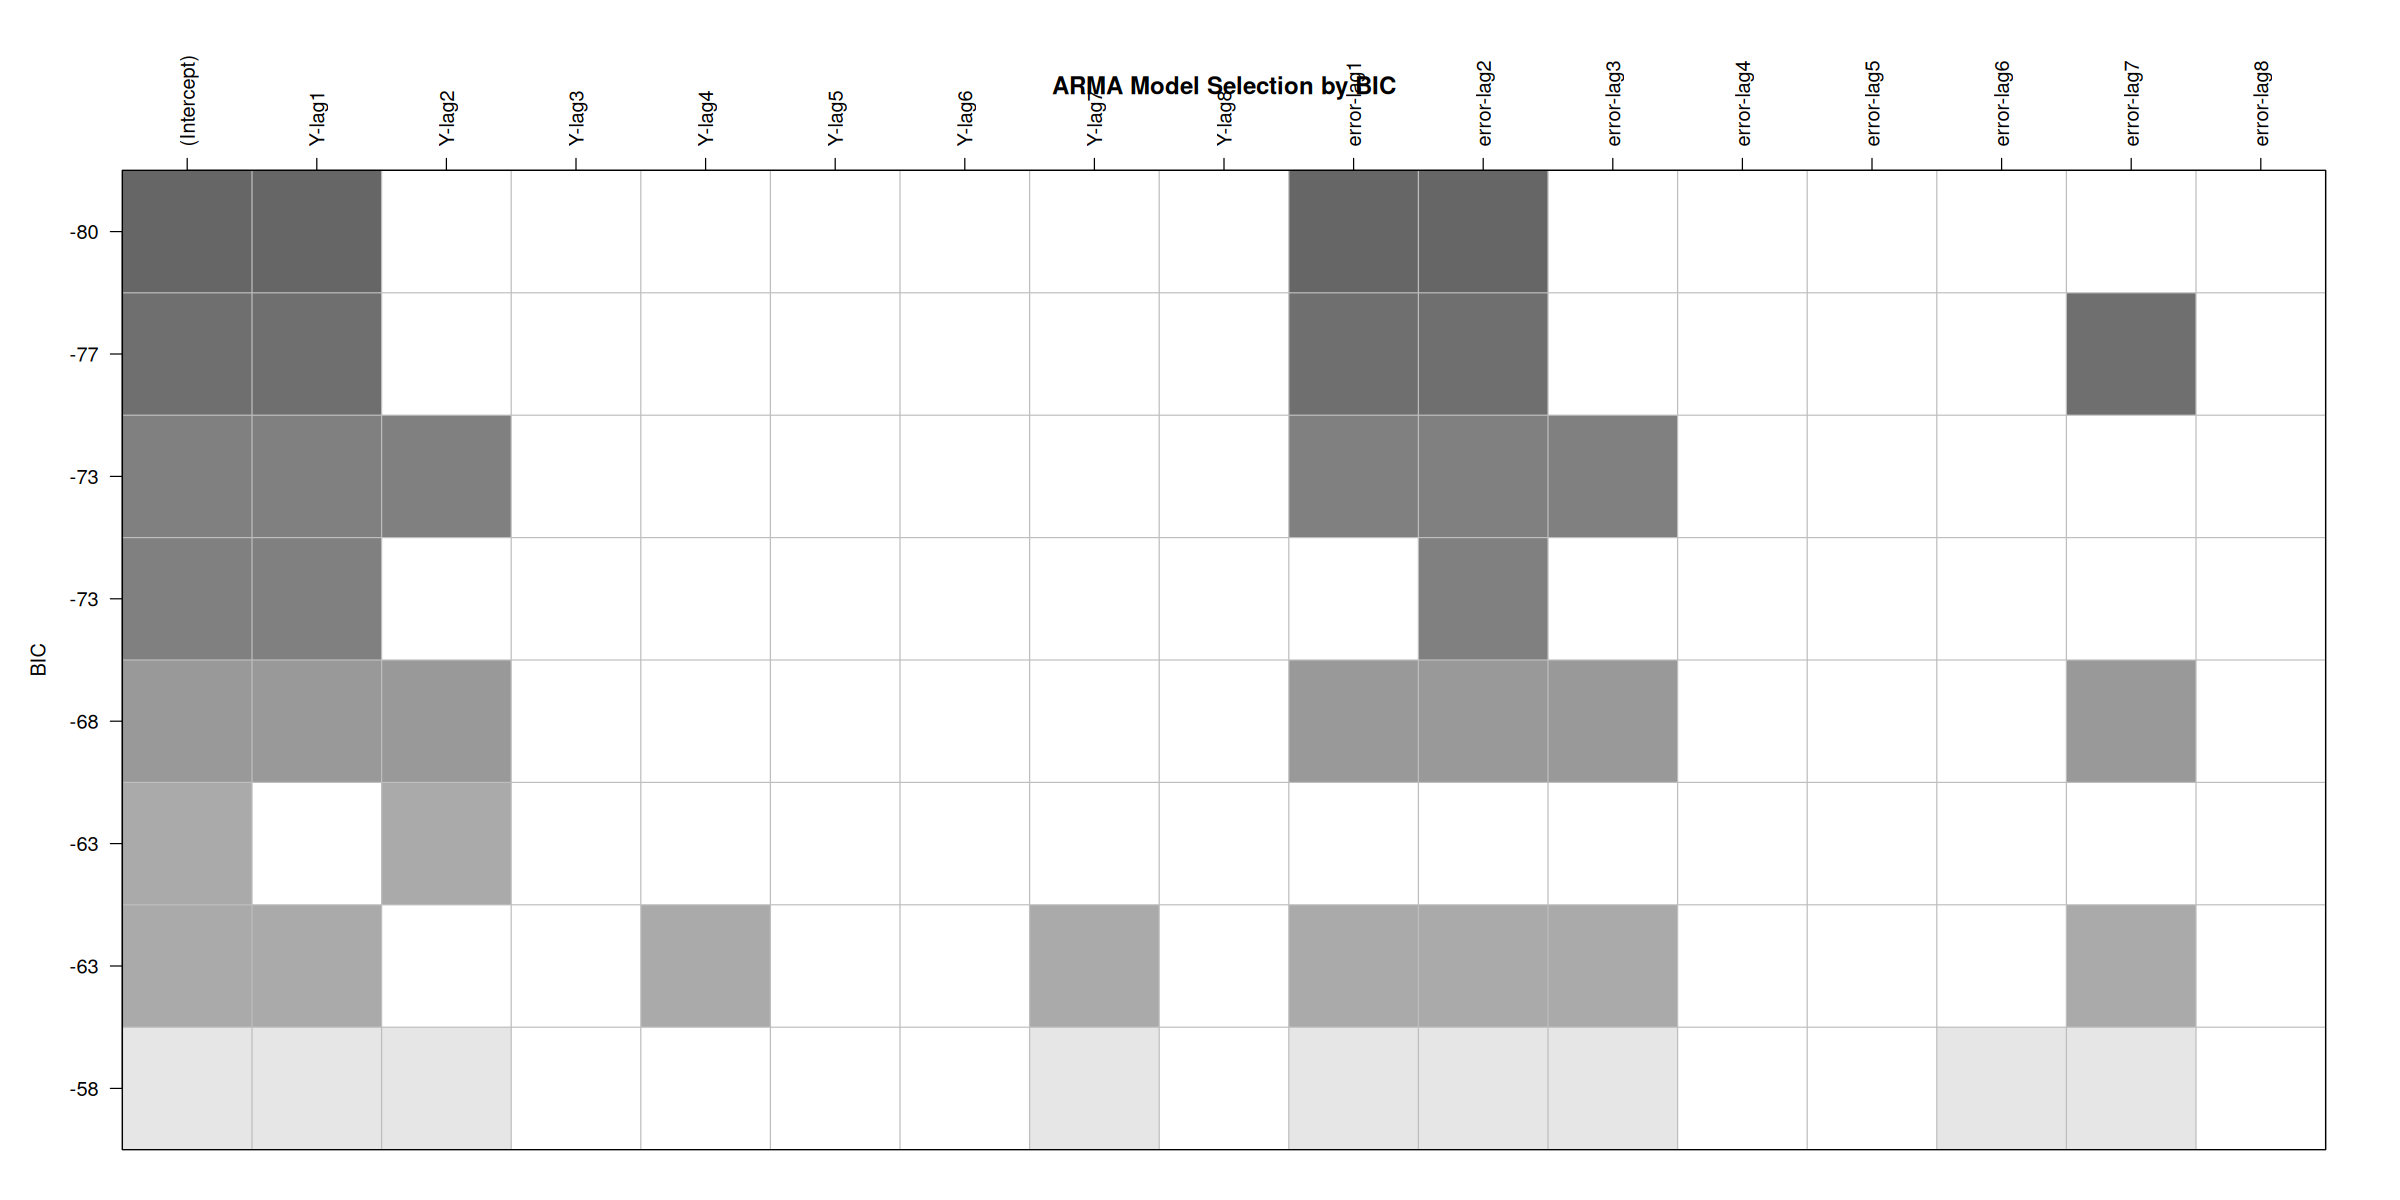

In [ ]:
# Model identification using armasubsets on twice-differenced data
ssubset_results <- armasubsets(y = diff2_ts, nar = 8, nma = 8,
                              ar.method = "ols")

# Plot results
par(bg = "white")
plot(subset_results, which = "bic", main = "ARMA Model Selection by BIC",
     xlab = "AR and MA terms", ylab = "BIC", cex.axis = 1, cex.lab = 1)

**Best models using armasubsets()**

- ARIMA(1,2,2)
- ARIMA(1,2,7)
- ARIMA(2,2,3)
- ARIMA(1,2,2)

In [19]:
# Grid search for best ARIMA models with d=2
max_p <- 8
max_q <- 8
d <- 2  # Using second-order differencing

aic_values <- matrix(NA, nrow = max_p + 1, ncol = max_q + 1)
bic_values <- matrix(NA, nrow = max_p + 1, ncol = max_q + 1)

cat("\nFitting ARIMA models with second-order differencing (d=2)...\n")
for (p in 0:max_p) {
  for (q in 0:max_q) {
    if (p == 0 && q == 0) next
    
    cat(sprintf("Fitting ARIMA(%d,%d,%d)...\n", p, d, q))
    
    tryCatch({
      model <- Arima(transformed_ts, order = c(p, d, q))
      aic_values[p+1, q+1] <- model$aic
      bic_values[p+1, q+1] <- model$bic
    }, error = function(e) {
      cat("  Error:", e$message, "\n")
    })
  }
}

model_data <- data.frame(
  p = rep(0:max_p, each = max_q + 1),
  q = rep(0:max_q, max_p + 1),
  AIC = as.vector(aic_values),
  BIC = as.vector(bic_values)
)

model_data <- model_data[!is.na(model_data$AIC) & !is.na(model_data$BIC), ]
model_data$Model <- paste0("(", model_data$p, ",2,", model_data$q, ")")

best_aic_model <- model_data[which.min(model_data$AIC), ]
best_bic_model <- model_data[which.min(model_data$BIC), ]

cat("\nBest model by AIC: ARIMA", best_aic_model$Model, "with AIC =", round(best_aic_model$AIC, 2), "\n")
cat("Best model by BIC: ARIMA", best_bic_model$Model, "with BIC =", round(best_bic_model$BIC, 2), "\n")


Fitting ARIMA models with second-order differencing (d=2)...
Fitting ARIMA(0,2,1)...
Fitting ARIMA(0,2,2)...
Fitting ARIMA(0,2,3)...
Fitting ARIMA(0,2,4)...
Fitting ARIMA(0,2,5)...
Fitting ARIMA(0,2,6)...
Fitting ARIMA(0,2,7)...
Fitting ARIMA(0,2,8)...
Fitting ARIMA(1,2,0)...
Fitting ARIMA(1,2,1)...
Fitting ARIMA(1,2,2)...
Fitting ARIMA(1,2,3)...
Fitting ARIMA(1,2,4)...
Fitting ARIMA(1,2,5)...
Fitting ARIMA(1,2,6)...
Fitting ARIMA(1,2,7)...
Fitting ARIMA(1,2,8)...
Fitting ARIMA(2,2,0)...
Fitting ARIMA(2,2,1)...
Fitting ARIMA(2,2,2)...
Fitting ARIMA(2,2,3)...
Fitting ARIMA(2,2,4)...
Fitting ARIMA(2,2,5)...
Fitting ARIMA(2,2,6)...
Fitting ARIMA(2,2,7)...
Fitting ARIMA(2,2,8)...
Fitting ARIMA(3,2,0)...
Fitting ARIMA(3,2,1)...
Fitting ARIMA(3,2,2)...
Fitting ARIMA(3,2,3)...
Fitting ARIMA(3,2,4)...
Fitting ARIMA(3,2,5)...
Fitting ARIMA(3,2,6)...
Fitting ARIMA(3,2,7)...
Fitting ARIMA(3,2,8)...
Fitting ARIMA(4,2,0)...
Fitting ARIMA(4,2,1)...
Fitting ARIMA(4,2,2)...
Fitting ARIMA(4,2,3)...
Fi

In [20]:
# 7. Out-of-Sample Forecast Evaluation

# Split data for training and testing
n_quarters <- length(transformed_ts)
train_end <- n_quarters - 12  # Use last 3 years (12 quarters) for testing

train_ts <- window(transformed_ts, end = c(time(transformed_ts)[train_end]))
test_ts <- window(transformed_ts, start = c(time(transformed_ts)[train_end + 1]))

# Define candidate models (with d=2)
candidate_models <- list(
  list(p=1, d=2, q=2, name="ARIMA(1,2,2) - Top ARMASUBSETS Model"),
  list(p=1, d=2, q=7, name="ARIMA(1,2,7) - Top ARMASUBSETS Model"),
  list(p=2, d=2, q=3, name="ARIMA(2,2,3) - Top ARMASUBSETS Model"),
  list(p=3, d=2, q=2, name="ARIMA(3,2,2) - Best AIC (Grid Search)"),
  list(p=2, d=2, q=1, name="ARIMA(2,2,1) - Best BIC (Grid Search)")
)


# Add best AIC and BIC models if they're not already in the list
if (!paste0("(", best_aic_model$p, ",2,", best_aic_model$q, ")") %in% sapply(candidate_models, function(x) paste0("(", x$p, ",2,", x$q, ")"))) {
  candidate_models <- c(candidate_models, list(list(
    p=best_aic_model$p, d=2, q=best_aic_model$q, 
    name=paste0("ARIMA", best_aic_model$Model, " - Best AIC")
  )))
}

if (!paste0("(", best_bic_model$p, ",2,", best_bic_model$q, ")") %in% sapply(candidate_models, function(x) paste0("(", x$p, ",2,", x$q, ")"))) {
  candidate_models <- c(candidate_models, list(list(
    p=best_bic_model$p, d=2, q=best_bic_model$q, 
    name=paste0("ARIMA", best_bic_model$Model, " - Best BIC")
  )))
}

# Fit models and evaluate forecasts
forecast_results <- data.frame(
  Model = character(),
  RMSE = numeric(),
  MAE = numeric(),
  MAPE = numeric(),
  stringsAsFactors = FALSE
)

fitted_models <- list()

for (model in candidate_models) {
  model_name <- model$name
  p <- model$p
  d <- model$d
  q <- model$q
  
  cat(sprintf("\nFitting %s...\n", model_name))
  
  tryCatch({
    # Fit model
    arima_model <- Arima(train_ts, order = c(p, d, q))
    fitted_models[[model_name]] <- arima_model
    
    # Generate forecasts
    h <- length(test_ts)
    forecasts <- forecast(arima_model, h = h)
    
    # Calculate error metrics
    errors <- test_ts - forecasts$mean
    rmse <- sqrt(mean(errors^2))
    mae <- mean(abs(errors))
    mape <- mean(abs(errors / test_ts)) * 100
    
    cat(sprintf("RMSE: %.4f, MAE: %.4f, MAPE: %.2f%%\n", rmse, mae, mape))
    
    # Add to results
    forecast_results <- rbind(forecast_results, data.frame(
      Model = model_name,
      RMSE = rmse,
      MAE = mae,
      MAPE = mape
    ))
    
  }, error = function(e) {
    cat("  Error:", e$message, "\n")
  })
}

# Sort by RMSE
forecast_results <- forecast_results[order(forecast_results$RMSE), ]
rownames(forecast_results) <- NULL

cat("\nOut-of-sample forecast accuracy comparison:\n")
print(forecast_results)

# Identify best model
best_model_name <- forecast_results$Model[1]
cat("\nBest model based on forecast accuracy (RMSE):", best_model_name, "\n")


Fitting ARIMA(1,2,2) - Top ARMASUBSETS Model...
RMSE: 0.0143, MAE: 0.0103, MAPE: 0.01%

Fitting ARIMA(1,2,7) - Top ARMASUBSETS Model...
RMSE: 0.0459, MAE: 0.0342, MAPE: 0.03%

Fitting ARIMA(2,2,3) - Top ARMASUBSETS Model...
RMSE: 0.0458, MAE: 0.0342, MAPE: 0.03%

Fitting ARIMA(3,2,2) - Best AIC (Grid Search)...
RMSE: 0.0195, MAE: 0.0145, MAPE: 0.01%

Fitting ARIMA(2,2,1) - Best BIC (Grid Search)...
RMSE: 0.0119, MAE: 0.0087, MAPE: 0.01%

Out-of-sample forecast accuracy comparison:
                                  Model       RMSE         MAE        MAPE
1 ARIMA(2,2,1) - Best BIC (Grid Search) 0.01194347 0.008720822 0.007476196
2  ARIMA(1,2,2) - Top ARMASUBSETS Model 0.01425632 0.010346194 0.008868598
3 ARIMA(3,2,2) - Best AIC (Grid Search) 0.01954479 0.014482531 0.012415920
4  ARIMA(2,2,3) - Top ARMASUBSETS Model 0.04579565 0.034169028 0.029293764
5  ARIMA(1,2,7) - Top ARMASUBSETS Model 0.04591478 0.034216225 0.029333825

Best model based on forecast accuracy (RMSE): ARIMA(2,2,1) - B

Fitting ARIMA(2,2,1) on full data

	Ljung-Box test

data:  Residuals from ARIMA(2,2,1)
Q* = 34.459, df = 5, p-value = 1.929e-06

Model df: 3.   Total lags used: 8



Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.


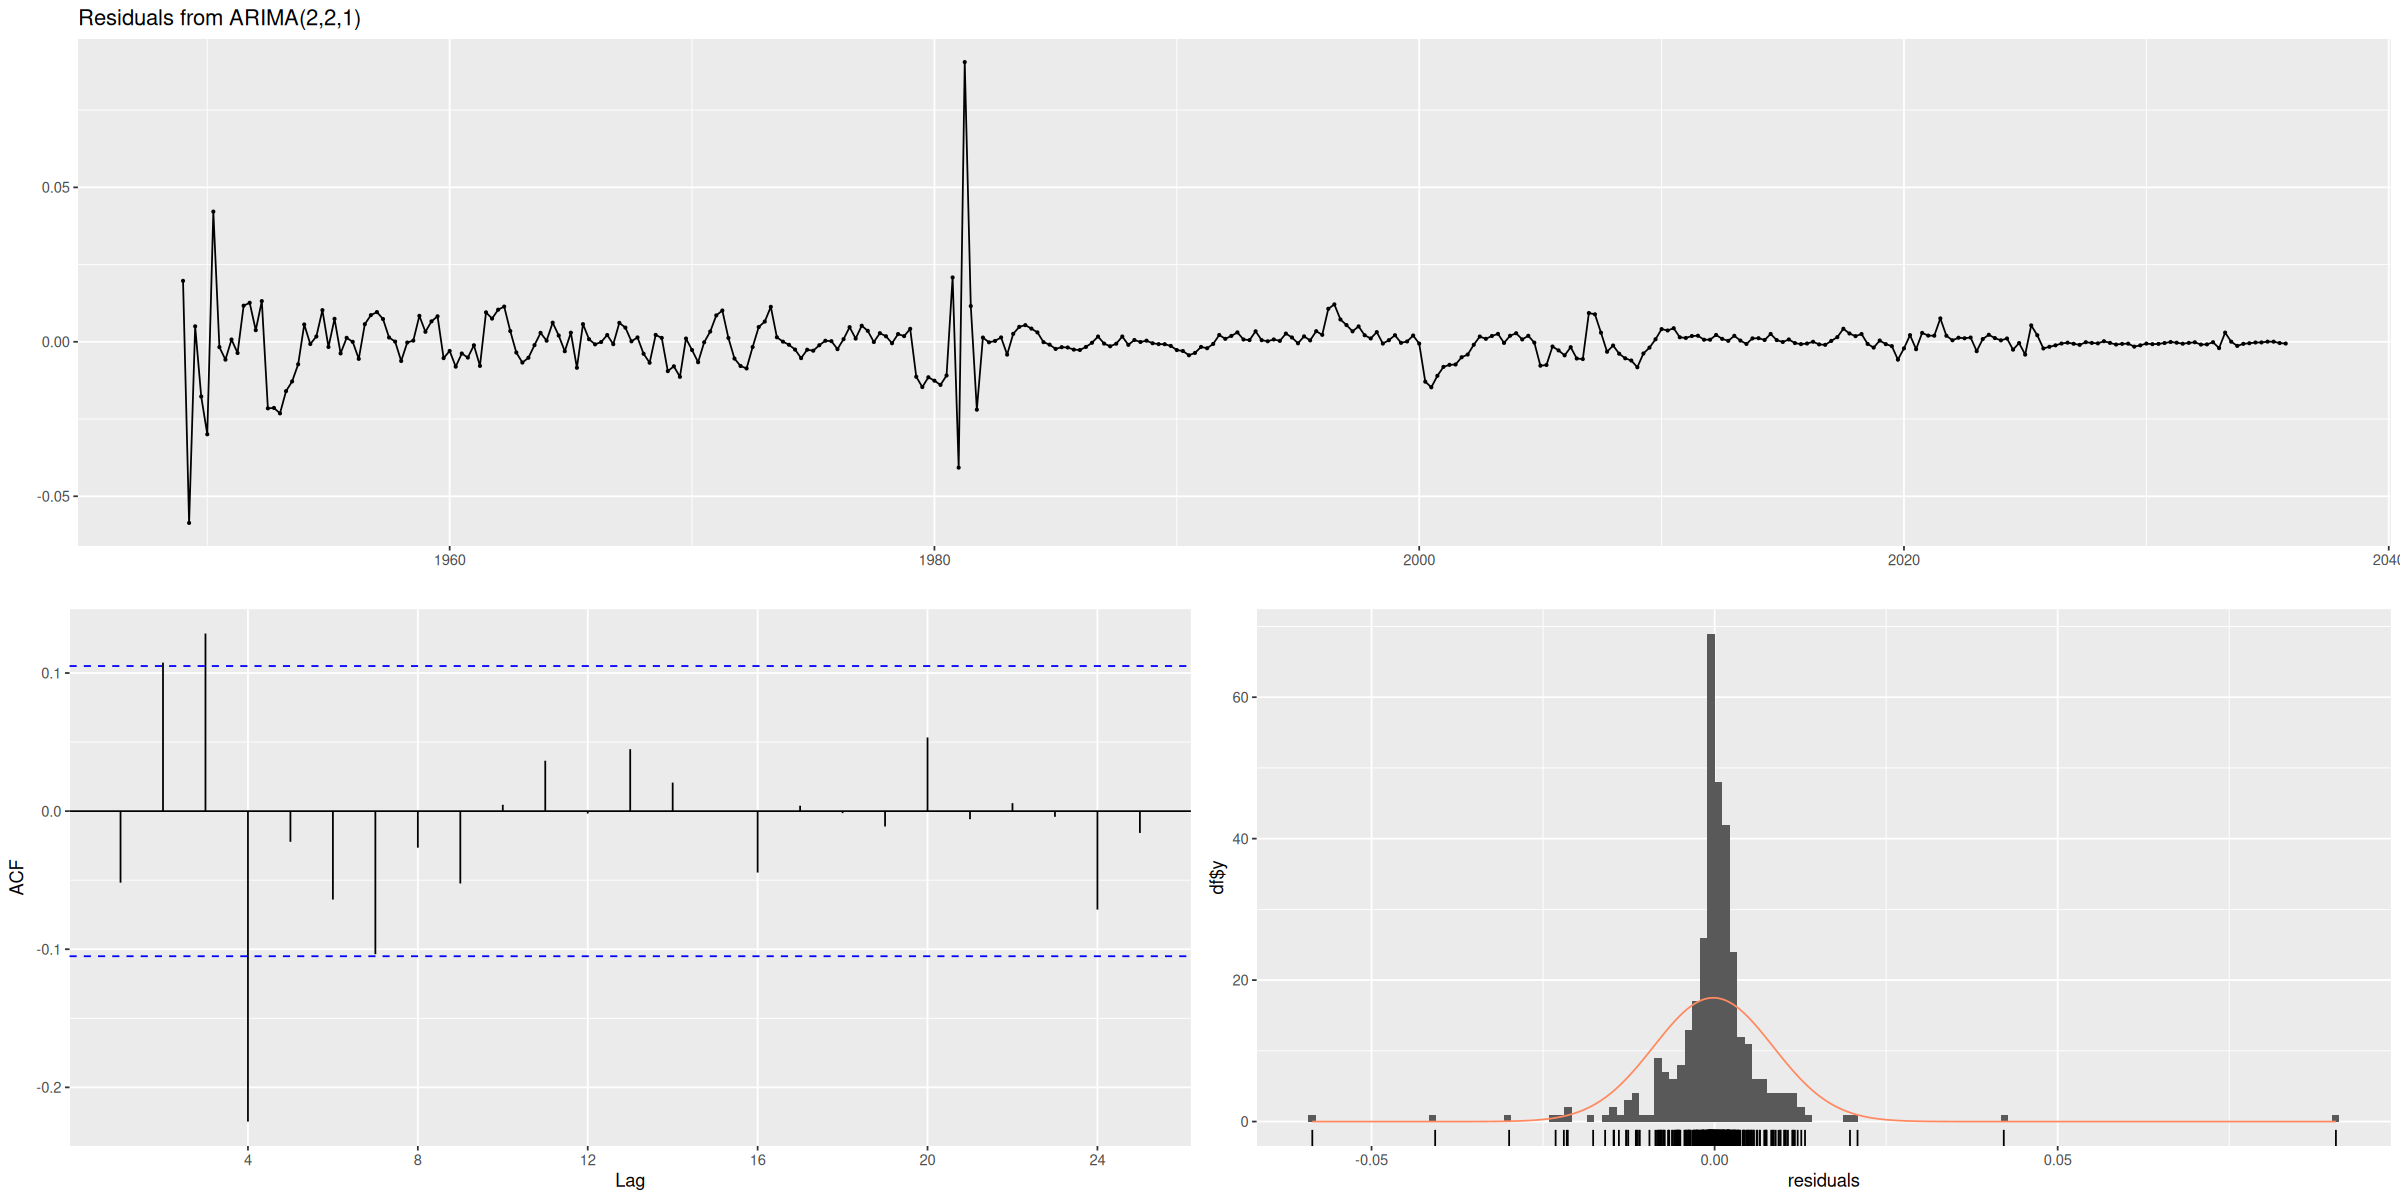


Shapiro-Wilk test for normality:

	Shapiro-Wilk normality test

data:  residuals(final_model)
W = 0.64983, p-value < 2.2e-16

Interpretation: p-value < 0.05, residuals not normally distributed 

Ljung-Box test for autocorrelation:

	Box-Ljung test

data:  residuals(final_model)
X-squared = 35.935, df = 12, p-value = 0.0003319

Interpretation: p-value < 0.05, significant autocorrelation remains 

ARCH test for conditional heteroskedasticity:

	ARCH LM-test; Null hypothesis: no ARCH effects

data:  residuals(final_model)
Chi-squared = 17.755, df = 12, p-value = 0.1233

Interpretation: p-value > 0.05, no significant ARCH effects detected 

Runs test could not be calculated. Consider checking for constant values in residuals.


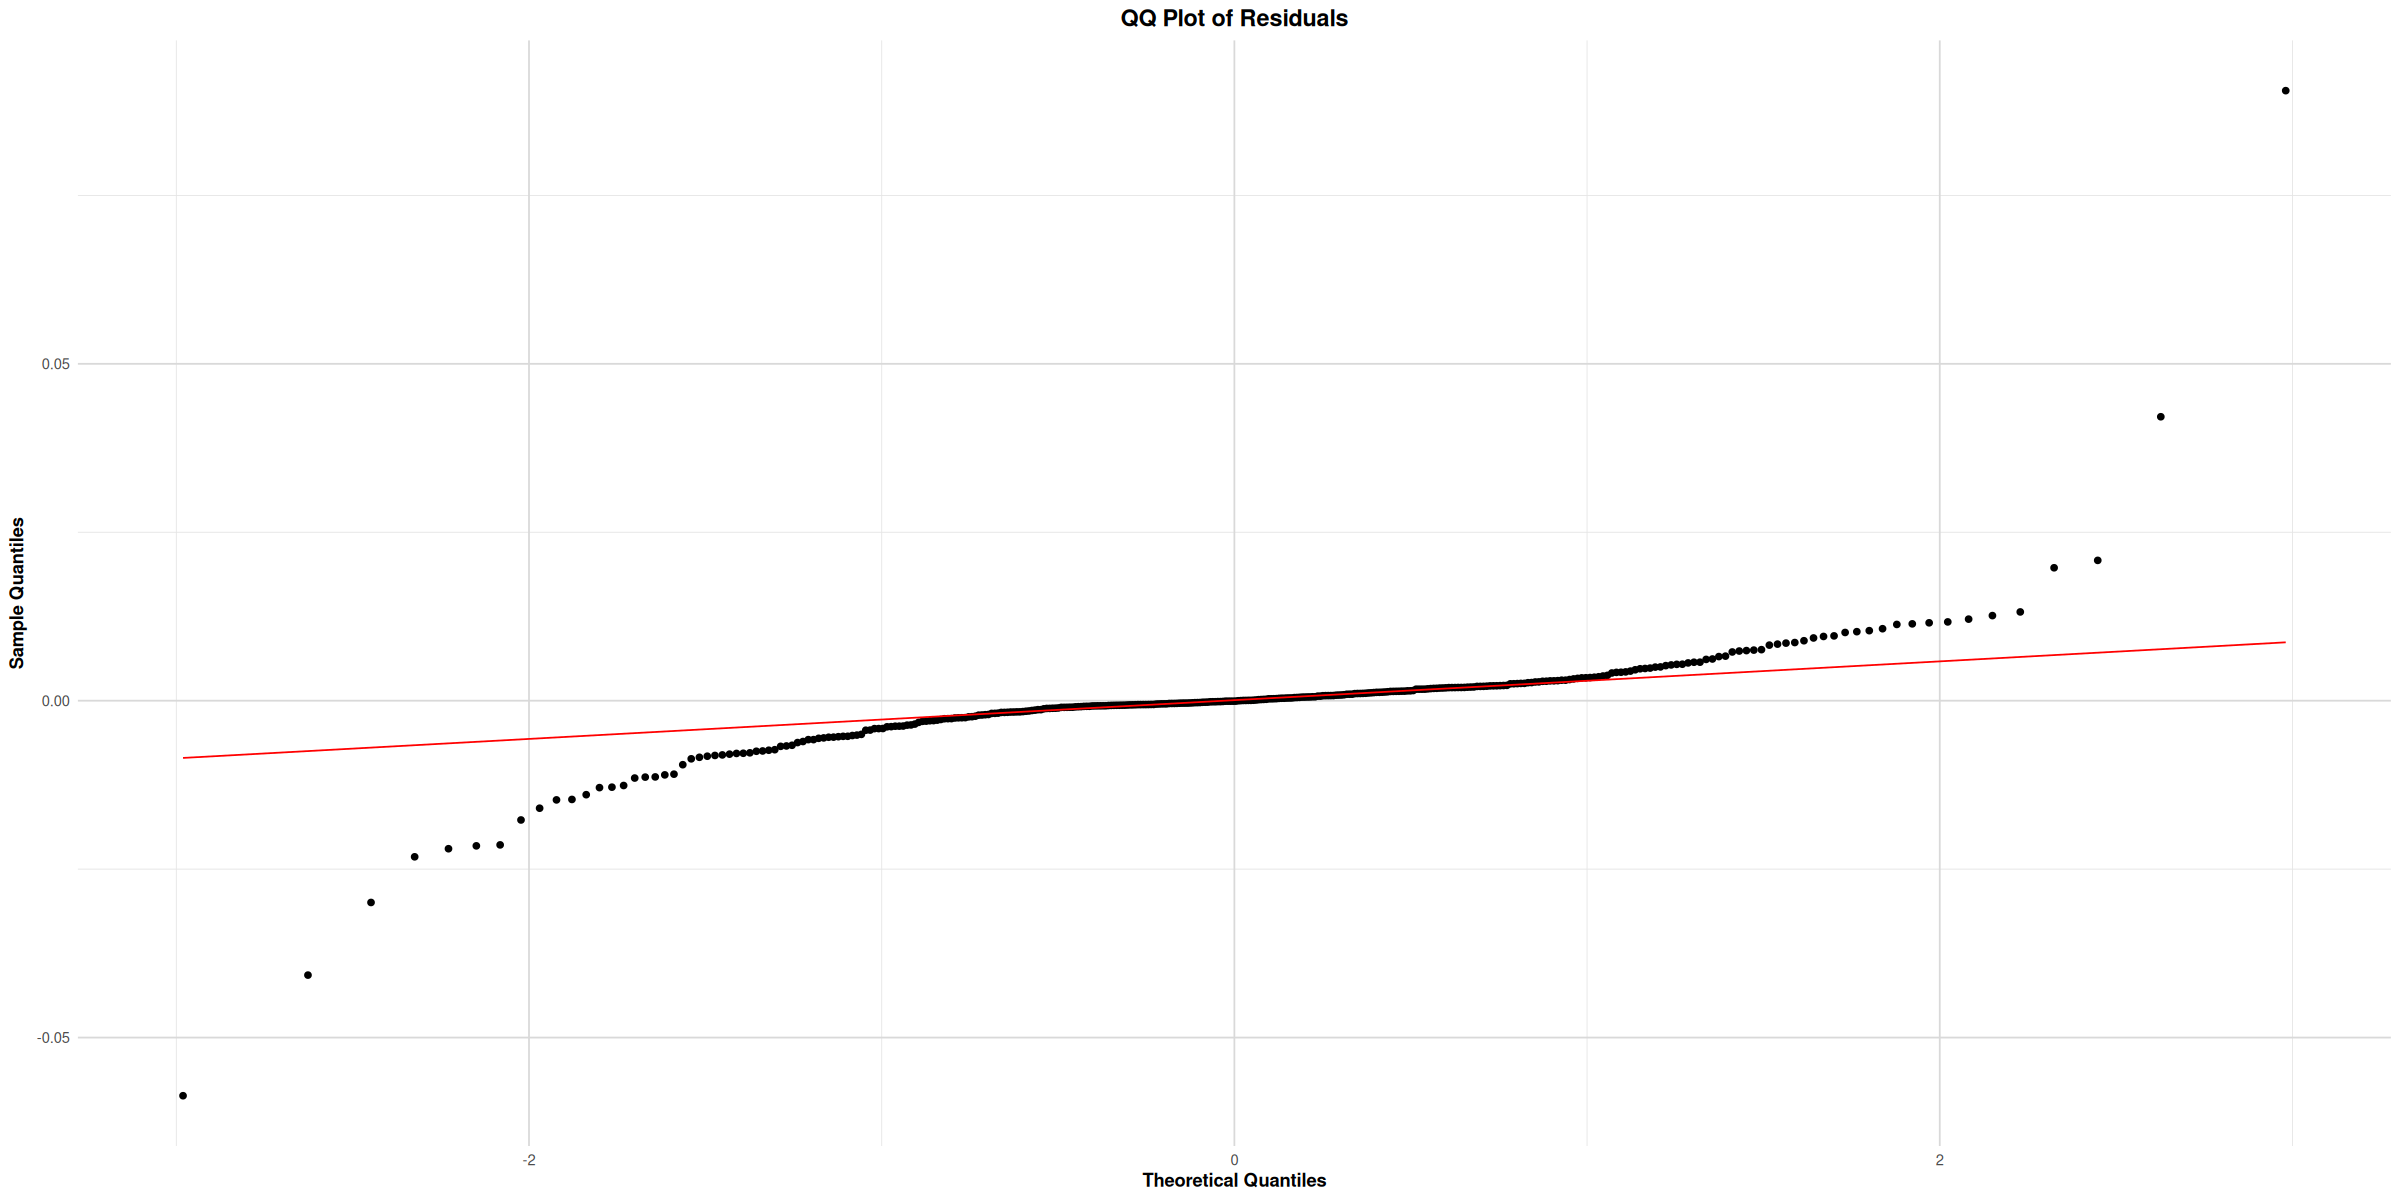

In [21]:
# 8. Diagnostic Testing of Best Model

# Extract p and q from best model name safely
p <- tryCatch({
  as.numeric(gsub(".*\\(([0-9]+),2,([0-9]+).*", "\\1", best_model_name))
}, error = function(e) {
  cat("Error extracting p parameter, defaulting to 1\n")
  return(1)
})

q <- tryCatch({
  as.numeric(gsub(".*\\(([0-9]+),2,([0-9]+).*", "\\2", best_model_name))
}, error = function(e) {
  cat("Error extracting q parameter, defaulting to 1\n")
  return(1)
})

# If extraction failed and returned NA, default to 1,1
if (is.na(p)) p <- 1
if (is.na(q)) q <- 1

# Refit best model on full transformed data
cat("Fitting ARIMA(", p, ",2,", q, ") on full data\n", sep="")
final_model <- Arima(transformed_ts, order = c(p, 2, q))

# Check residuals
checkresiduals(final_model)

# QQ plot
p_qq <- ggplot(data.frame(Residuals = residuals(final_model)), aes(sample = Residuals)) +
  stat_qq() +
  stat_qq_line(color = "red") +
  labs(
    title = "QQ Plot of Residuals",
    x = "Theoretical Quantiles",
    y = "Sample Quantiles"
  ) +
  theme_tsa()
print(p_qq)

# Normality test
shapiro_test <- shapiro.test(residuals(final_model))
cat("\nShapiro-Wilk test for normality:\n")
print(shapiro_test)
cat("Interpretation: p-value", ifelse(shapiro_test$p.value > 0.05, 
    "> 0.05, residuals appear normally distributed", 
    "< 0.05, residuals not normally distributed"), "\n")

# Ljung-Box test for autocorrelation
lb_test <- Box.test(residuals(final_model), lag = 12, type = "Ljung-Box")
cat("\nLjung-Box test for autocorrelation:\n")
print(lb_test)
cat("Interpretation: p-value", ifelse(lb_test$p.value > 0.05, 
    "> 0.05, no significant autocorrelation remains", 
    "< 0.05, significant autocorrelation remains"), "\n")

# ARCH test for heteroskedasticity
arch_test <- ArchTest(residuals(final_model), lags = 12)
cat("\nARCH test for conditional heteroskedasticity:\n")
print(arch_test)
cat("Interpretation: p-value", ifelse(arch_test$p.value > 0.05, 
    "> 0.05, no significant ARCH effects detected", 
    "< 0.05, ARCH effects present"), "\n")

# Runs test for randomness
runs_test <- tryCatch({
  runs.test(residuals(final_model) > 0)
}, error = function(e) {
  cat("Error in runs test:", e$message, "\n")
  return(list(p.value = NA, statistic = NA))
})

if (!is.na(runs_test$p.value)) {
  cat("\nRuns test for randomness:\n")
  print(runs_test)
  cat("Interpretation: p-value", ifelse(runs_test$p.value > 0.05, 
      "> 0.05, residuals appear random", 
      "< 0.05, residuals may not be random"), "\n")
} else {
  cat("\nRuns test could not be calculated. Consider checking for constant values in residuals.\n")
}